In [1678]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from tqdm.notebook import tqdm
import seaborn as sns

In [1679]:
def open_data(file_name, data_cars):
    with open(f'{file_name}', 'r') as data:
        for record in data:
            res = {}
            for paars in record[1:-2].split(", '"):
                key, value = paars.split("':")
                value = value.replace("'","").strip()
                if value == 'None':
                    value = None
                res[key.replace("'","").strip()] = value
            if res['ann_id'] not in ann_ids:
                data_cars.append(res)
                ann_ids.add(res['ann_id'])
    data.close()
    return data_cars

In [1680]:
data_cars = []
ann_ids = set()
open_data('data.txt', data_cars)

[{'url_car': 'https://auto.ru/cars/used/sale/vaz/kalina/1125722974-116e409c/',
  'car_make': 'Lada (ВАЗ)',
  'car_model': 'Kalina',
  'car_gen': 'I',
  'car_type': 'Хэтчбек 5 дв.',
  'car_compl': '1.6 MT (81 л.с.)',
  'ann_date': '2024-10-31',
  'ann_id': '1125722974',
  'car_price': '250000',
  'ann_city': 'Ставрополь',
  'link_cpl': 'https://auto.ru/catalog/cars/vaz/kalina/2307278/2494307/specifications/2494307_7856949_2494317/',
  'avail': 'В наличии',
  'year': '2008',
  'mileage': '202000',
  'color': 'серебристый',
  'eng_size': '1.6',
  'eng_power': '81',
  'eng_power_kw': None,
  'eng_type': 'Бензин',
  'pow_resrv': None,
  'options': 'Стандарт',
  'transmission': 'механическая',
  'drive': 'передний',
  'st_wheel': 'Левый',
  'condition': 'Не требует ремонта',
  'count_owner': '3 или более',
  'original_pts': 'Дубликат',
  'customs': 'Растаможен',
  'state_mark': 'Россия',
  'class_auto': 'B',
  'door_count': '5',
  'seat_count': '5',
  'long': '3850',
  'widht': '1700',
  'he

In [1681]:
for record in data_cars:
    
    # в некоторых записях количество мест указано через запятую, берем первое число
    if ',' in record['seat_count']:
        record['seat_count'] = record['seat_count'].split(',')[0]
    
    # в некоторых записях клиренс указан в виде диапазона, берем нижнюю границу
    if record['clearence'] != None and '-' in record['clearence']:
            record['clearence'] = record['clearence'].split('-')[0]   
    
    # в некоторых записях объем багажника указан через дробь, берем первое число
    if record['v_bag'] != None and '/' in record['v_bag']:
            record['v_bag'] = record['v_bag'].split('/')[0]

    # в некоторых записях указан прочерк, меняем его на None
    if record['fuel_cons'] != None and '-' == record['fuel_cons']:
            record['fuel_cons'] = None

In [1682]:
# включили отображение всех столбцов
pd.set_option('display.max_columns', None)

In [1683]:
df = pd.DataFrame(data_cars)
df.head(10)

url_car    car_make  \
0  https://auto.ru/cars/used/sale/vaz/kalina/1125...  Lada (ВАЗ)   
1  https://auto.ru/cars/used/sale/volkswagen/mult...  Volkswagen   
2  https://auto.ru/cars/used/sale/toyota/land_cru...      Toyota   
3  https://auto.ru/cars/used/sale/chevrolet/orlan...   Chevrolet   
4  https://auto.ru/cars/used/sale/hyundai/getz/11...     Hyundai   
5  https://auto.ru/cars/used/sale/nissan/qashqai/...      Nissan   
6  https://auto.ru/cars/used/sale/hyundai/creta/1...     Hyundai   
7  https://auto.ru/cars/used/sale/vaz/2114/112572...  Lada (ВАЗ)   
8  https://auto.ru/cars/used/sale/vaz/2121/112572...  Lada (ВАЗ)   
9  https://auto.ru/cars/used/sale/subaru/legacy/1...      Subaru   

      car_model                  car_gen           car_type  \
0        Kalina                        I      Хэтчбек 5 дв.   
1      Multivan                       T6            Минивэн   
2  Land Cruiser  200 Series Рестайлинг 2  Внедорожник 5 дв.   
3       Orlando                        I         Компактвэн   
4          Getz             I Рестайлинг      Хэтчбек 5 дв.   
5       Qashqai                       II  Внедорожник 5 дв.   
6         Creta                       II  Внедорожник 5 дв.   
7          2114                2001-2013      Хэтчбек 5 дв.   
8    2121 (4x4)             I Рестайлинг  Внедорожник 3 дв.   
9        Legacy                       IV              Седан   

                car_compl    ann_date      ann_id car_price      ann_city  \
0        1.6 MT (81 л.с.)  2024-10-31  1125722974    250000    Ставрополь   
1     2.0d AMT (199 л.с.)  2024-10-31  1125722973   4000000       Воронеж   
2  4.5d AT (249 л.с.) 4WD  2024-10-31  1125722972   6800000     Краснодар   
3       1.8 AT (141 л.с.)  2024-10-31  1125722971   1000000        Казань   
4        1.4 AT (97 л.с.)  2024-10-21  1125428762    550000        Москва   
5      2.0 CVT (144 л.с.)  2024-10-31  1125722967   2100000        Москва   
6       1.6 AT (123 л.с.)  2024-10-31  1125722966   2530000     Челябинск   
7        1.6 MT (81 л.с.)  2024-10-31  1125722962    285000     Кингисепп   
8    1.7 MT (83 л.с.) 4WD  2024-10-31  1125722960    490000  Кушнаренково   
9   2.0 AT (164 л.с.) 4WD  2024-10-31  1125722959   1200000      Белгород   

                                            link_cpl      avail  year mileage  \
0  https://auto.ru/catalog/cars/vaz/kalina/230727...  В наличии  2008  202000   
1  https://auto.ru/catalog/cars/volkswagen/multiv...  В наличии  2019  158400   
2  https://auto.ru/catalog/cars/toyota/land_cruis...  В наличии  2016   94000   
3  https://auto.ru/catalog/cars/chevrolet/orlando...  В наличии  2012  130000   
4  https://auto.ru/catalog/cars/hyundai/getz/2306...  В наличии  2007  200000   
5  https://auto.ru/catalog/cars/nissan/qashqai/20...  В наличии  2016   96000   
6  https://auto.ru/catalog/cars/hyundai/creta/229...  В наличии  2021   40000   
7  https://auto.ru/catalog/cars/vaz/2114/3913672/...  В наличии  2007  120000   
8  https://auto.ru/catalog/cars/vaz/2121/2307327/...  В наличии  2015   65000   
9  https://auto.ru/catalog/cars/subaru/legacy/349...  В наличии  2005  312000   

         color eng_size eng_power eng_power_kw eng_type pow_resrv  \
0  серебристый      1.6        81         None   Бензин      None   
1       чёрный      2.0       199         None   Дизель      None   
2        белый      4.5       249         None   Дизель      None   
3        серый      1.8       141         None   Бензин      None   
4       чёрный      1.4        97         None   Бензин      None   
5  серебристый      2.0       144         None   Бензин      None   
6        серый      1.6       123         None   Бензин      None   
7  серебристый      1.6        81         None   Бензин      None   
8      зелёный      1.7        83         None   Бензин      None   
9        синий      2.0       164         None   Бензин      None   

                options      transmission     drive st_wheel  \
0              Стандарт      механичес

In [1684]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url_car       6798 non-null   object
 1   car_make      6798 non-null   object
 2   car_model     6798 non-null   object
 3   car_gen       6798 non-null   object
 4   car_type      6798 non-null   object
 5   car_compl     6798 non-null   object
 6   ann_date      6798 non-null   object
 7   ann_id        6798 non-null   object
 8   car_price     6798 non-null   object
 9   ann_city      6798 non-null   object
 10  link_cpl      6798 non-null   object
 11  avail         6798 non-null   object
 12  year          6798 non-null   object
 13  mileage       6798 non-null   object
 14  color         6798 non-null   object
 15  eng_size      6710 non-null   object
 16  eng_power     6798 non-null   object
 17  eng_power_kw  88 non-null     object
 18  eng_type      6798 non-null   object
 19  pow_re

In [1685]:
df.isnull().sum()/len(df)

url_car        0.000
car_make       0.000
car_model      0.000
car_gen        0.000
car_type       0.000
car_compl      0.000
ann_date       0.000
ann_id         0.000
car_price      0.000
ann_city       0.000
link_cpl       0.000
avail          0.000
year           0.000
mileage        0.000
color          0.000
eng_size       0.013
eng_power      0.000
eng_power_kw   0.987
eng_type       0.000
pow_resrv      0.987
options        0.000
transmission   0.000
drive          0.000
st_wheel       0.000
condition      0.000
count_owner    0.000
original_pts   0.004
customs        0.000
state_mark     0.000
class_auto     0.002
door_count     0.000
seat_count     0.000
long           0.000
widht          0.000
height         0.000
clearence      0.023
v_bag          0.072
v_tank         0.022
curb_weight    0.025
gross_weight   0.119
front_brakes   0.000
rear_brakes    0.009
max_speed      0.056
acceleration   0.061
fuel_cons      0.136
fuel_brand     0.015
engine_loc1    0.013
engine_loc2  

In [1686]:
df['ann_date'] = pd.to_datetime(df['ann_date'])
df['car_price'] = df['car_price'].astype('int')
df['year'] = df['year'].astype('int')
df['mileage'] = df['mileage'].astype('float')/1000
df['eng_size'] = df['eng_size'].astype('float')
df['eng_power'] = df['eng_power'].astype('int')
df['eng_power_kw'] = df['eng_power_kw'].astype('float')
df['pow_resrv'] = df['pow_resrv'].astype('float')
df['door_count'] = df['door_count'].astype('int')
df['seat_count'] = df['seat_count'].astype('int')
df['long'] = df['long'].astype('float')/1000
df['widht'] = df['widht'].astype('float')/1000
df['height'] = df['height'].astype('float')/1000
df['clearence'] = df['clearence'].astype('float')/10
df['v_bag'] = df['v_bag'].astype('float')
df['v_tank'] = df['v_tank'].astype('float')
df['curb_weight'] = df['curb_weight'].astype('float')/1000
df['gross_weight'] = df['gross_weight'].astype('float')/1000
df['max_speed'] = df['max_speed'].astype('float')
df['acceleration'] = df['acceleration'].astype('float')
df['fuel_cons'] = df['fuel_cons'].astype('float')
df['max_torq'] = df['max_torq'].astype('float')
df['cyl_count'] = df['cyl_count'].astype('float')

1. Датасет содержит нулевые значения, наибольшее их количество в полях, связанных с мощностью и запасом хода электромобилей. В связи с небошльшим их объем в датасете, полагаю лучшим решением удалить поля с указанными данными. 
2. Для электрокаров укажем количество цилиндров - 0
3. Для электрокаров укажем объем двигателя - 0

In [1687]:
df = df.drop(columns = ['eng_power_kw', 'pow_resrv'])
df['cyl_count'] = df['cyl_count'].fillna(0)
df['eng_size'] = df['eng_size'].fillna(0)

In [1688]:
df[df['class_auto'].isnull()]

url_car    car_make  \
458   https://auto.ru/cars/used/sale/citroen/jumpy/1...     Citroen   
1023  https://auto.ru/cars/used/sale/citroen/berling...     Citroen   
1044  https://auto.ru/cars/used/sale/volkswagen/tran...  Volkswagen   
1531  https://auto.ru/cars/used/sale/volkswagen/tran...  Volkswagen   
1757  https://auto.ru/cars/used/sale/ford/transit_cu...        Ford   
2781  https://auto.ru/cars/used/sale/volkswagen/tran...  Volkswagen   
2813  https://auto.ru/cars/used/sale/renault/dokker/...     Renault   
3142  https://auto.ru/cars/used/sale/renault/express...     Renault   
4019  https://auto.ru/cars/used/sale/peugeot/partner...     Peugeot   
4641  https://auto.ru/cars/used/sale/fiat/doblo/1125...        Fiat   
5639  https://auto.ru/cars/used/sale/volkswagen/tran...  Volkswagen   
6660  https://auto.ru/cars/used/sale/citroen/berling...     Citroen   

           car_model           car_gen    car_type               car_compl  \
458            Jumpy     II Рестайлинг      Фургон       1.6d MT (90 л.с.)   
1023        Berlingo      I Рестайлинг      Фургон        1.4 MT (75 л.с.)   
1044     Transporter                T6      Фургон      2.0d MT (102 л.с.)   
1531     Transporter                T4      Фургон       2.4d MT (78 л.с.)   
1757  Transit Custom  I (China Market)  Фургон LWB  LWB 2.0d MT (143 л.с.)   
2781     Transporter                T6      Фургон      2.0d MT (140 л.с.)   
2813          Dokker                 I      Фургон       1.5d MT (90 л.с.)   
3142         Express                II      Фургон       1.6 MT (114 л.с.)   
4019         Partner     II Рестайлинг      Фургон       1.6 MT (120 л.с.)   
4641           Doblo     II Рестайлинг      Фургон        1.4 MT (95 л.с.)   
5639     Transporter                T4      Фургон      2.5d MT (102 л.с.)   
6660        Berlingo   II Рестайлинг 2      Фургон       1.2 MT (110 л.с.)   

       ann_date      ann_id  car_price          ann_city  \
458  2024-10-31  1125725464    1100000            Москва   
1023 2024-10-31  1125728242     345000         Егорьевск   
1044 2024-10-31  1125731437    1540000             Химки   
1531 2024-10-21  1122084405     980000         Морозовск   
1757 2024-10-31  1123805910    4600000           Иркутск   
2781 2024-10-31  1125731455    1650000            Москва   
2813 2024-10-31  1125722356    1300000  Набережные Челны   
3142 2024-10-31  1125726135    3400000            Рязань   
4019 2024-11-02  1125753054     650000      Екатеринбург   
4641 2024-11-02  1125219279    1259000           Воронеж   
5639 2024-11-03  1125767859     850000   Санкт-Петербург   
6660 2024-11-03  1125772257     995000           Алексин   

                                               link_cpl      avail  year  \
458   https://auto.ru/catalog/cars/citroen/jumpy/200...  В наличии  2016   
1023  https://auto.ru/catalog/cars/citroen/berlingo/...  В наличии  2008   
1044  https://auto.ru/catalog/cars/volkswagen/transp...  В наличии  2019   
1531  https://auto.ru/catalog/cars/volkswagen/transp...  В наличии  1991   
1757  https://auto.ru/catalog/cars/ford/transit_cust...  В наличии  2024   
2781  https://auto.ru/catalog/cars/volkswagen/transp...  В наличии  2019   
2813  https://auto.ru/catalog/cars/renault/dokker/20...  В наличии  2018   
3142  https://auto.ru/catalog/cars/renault/express/2...  В наличии  2023   
4019  https://auto.ru/catalog/cars/peugeot/partner/8...  В наличии  2013   
4641  https://auto.ru/catalog/cars/fiat/doblo/204851...  В наличии  2019   
5639  https://auto.ru/catalog/cars/volkswagen/transp...  В наличии  1998   
6660  https://auto.ru/catalog/cars/citroen/berlingo/...  В наличии  2017   

      mileage   color  eng_size  eng_power eng_type     options  transmission  \
458   289.186   белый     1.600         90   Дизель     1 опция  механическая   
1023  248.000   белый     1.400         75   Бензин     2 опции  механическая   
1044  166.422   белый     2.000        102   Дизель     8 опций  механическая   
1531  600.000  

4. Исходя из специфичности фургонов введем для них новый класс авто

In [1689]:
df['class_auto'].value_counts().reset_index()

class_auto  count
0          C   1991
1          B   1516
2          D   1246
3          E    824
4          J    719
5          M    276
6          F    135
7          A     47
8          S     32

In [1690]:
df['class_auto'] = df['class_auto'].fillna('V')

Посмотрим, какие значения принимает поле "original_pts"

In [1691]:
df['original_pts'].value_counts().reset_index()

original_pts  count
0     Оригинал   5846
1     Дубликат    923

А также у каких строк отсутствует сведения о ПТС

In [1692]:
df[df['original_pts'].isnull()].head(10)

url_car    car_make car_model  \
9     https://auto.ru/cars/used/sale/subaru/legacy/1...      Subaru    Legacy   
745   https://auto.ru/cars/used/sale/skoda/rapid/112...       Skoda     Rapid   
905   https://auto.ru/cars/used/sale/kia/rio/1125395...         Kia       Rio   
993   https://auto.ru/cars/used/sale/tesla/model_3/1...       Tesla   Model 3   
1041  https://auto.ru/cars/used/sale/peugeot/408/112...     Peugeot       408   
1246  https://auto.ru/cars/used/sale/bmw/3er/1124330...         BMW   3 серии   
1282  https://auto.ru/cars/used/sale/vaz/largus/1125...  Lada (ВАЗ)    Largus   
1437  https://auto.ru/cars/used/sale/cadillac/escala...    Cadillac  Escalade   
1618  https://auto.ru/cars/used/sale/skoda/octavia/1...       Skoda   Octavia   
1636  https://auto.ru/cars/used/sale/vaz/2170/112572...  Lada (ВАЗ)    Priora   

           car_gen               car_type                          car_compl  \
9               IV                  Седан              2.0 AT (164 л.с.) 4WD   
745              I                Лифтбек                  1.6 MT (105 л.с.)   
905            III                  Седан                  1.4 AT (107 л.с.)   
993              I                  Седан  Long Range Electro AT (190.0 кВт)   
1041             I                  Седан                  1.6 AT (120 л.с.)   
1246     VII (G2x)                  Седан  320i xDrive 2.0 AT (184 л.с.) 4WD   
1282  I Рестайлинг  Универсал 5 дв. Cross            Cross 1.6 MT (106 л.с.)   
1437            IV  Внедорожник 5 дв. ESV          ESV 6.2 AT (426 л.с.) 4WD   
1618      III (A7)                Лифтбек                  1.2 MT (105 л.с.)   
1636             I                  Седан                   1.6 MT (98 л.с.)   

       ann_date      ann_id  car_price          ann_city  \
9    2024-10-31  1125722959    1200000          Белгород   
745  2024-10-31  1125726748     470000          Дорохово   
905  2024-10-26  1125395709     950000  Набережные Челны   
993  2024-10-28  1125572094    3800000   Санкт-Петербург   
1041 2024-10-31  1125728373     650000            Кукмор   
1246 2024-10-25  1124330318    3400000           Грозный   
1282 2024-10-31  1125728876    1850000          Курчалой   
1437 2024-10-25  1125542482    6950000            Москва   
1618 2024-10-31  1125728355     780000            Брянск   
1636 2024-10-31  1125728339     335000          Гудермес   

                                               link_cpl      avail  year  \
9     https://auto.ru/catalog/cars/subaru/legacy/349...  В наличии  2005   
745   https://auto.ru/catalog/cars/skoda/rapid/92757...  В наличии  2014   
905   https://auto.ru/catalog/cars/kia/rio/7694524/7...  В наличии  2014   
993   https://auto.ru/catalog/cars/tesla/model_3/210...  В наличии  2023   
1041  https://auto.ru/catalog/cars/peugeot/408/83508...  В наличии  2013   
1246  https://auto.ru/catalog/cars/bmw/3er/21398591/...  В наличии  2019   
1282  https://auto.ru/catalog/cars/vaz/largus/227496...  В наличии  2021   
1437  https://auto.ru/catalog/cars/cadillac/escalade...  В наличии  2017   
1618  https://auto.ru/catalog/cars/skoda/octavia/933...  В наличии  2013   
1636  https://auto.ru/catalog/cars/vaz/2170/2307319/...  В наличии  2007   

      mileage        color  eng_size  eng_power eng_type  \
9     312.000        синий     2.000        164   Бензин   
745    25.000        белый     1.600        105   Бензин   
905   132.000        белый     1.400        107   Бензин   
993     9.000        синий     0.000        258  Электро   
1041  130.000       чёрный     1.600        120   Бензин   
1246   70.000       чёрный     2.000        184   Бензин   
1282   78.000        серый     1.600        106   Бензин   
1437   86.600       чёрный     6.200        426   Бензин   
1618  920.000        белый     1.200        105   Бензин   
1636  253.000  серебристый     1.600         98   Бензин   

                         options    transmission     drive st_wheel  \
9                       52 опции  автоматичес

5. Наиболее оптимальным видится замена нулевых значений на "Дубликат"

In [1693]:
df['original_pts'] = df['original_pts'].fillna('Дубликат')

Посмотрим на модели у которых не указан клиренс

In [1694]:
df[df['clearence'].isnull()].head(10)

url_car       car_make  \
139  https://auto.ru/cars/used/sale/changan/uni_t/1...        Changan   
151  https://auto.ru/cars/used/sale/kia/carnival/11...            Kia   
250  https://auto.ru/cars/used/sale/toyota/camry/11...         Toyota   
431  https://auto.ru/cars/used/sale/chevrolet/monza...      Chevrolet   
594  https://auto.ru/cars/used/sale/mercedes/glc_co...  Mercedes-Benz   
620  https://auto.ru/cars/used/sale/hyundai/lafesta...        Hyundai   
638  https://auto.ru/cars/used/sale/porsche/911_gt3...        Porsche   
807  https://auto.ru/cars/used/sale/volkswagen/id4/...     Volkswagen   
827  https://auto.ru/cars/used/sale/toyota/camry/11...         Toyota   
863  https://auto.ru/cars/used/sale/audi/q8/1124750...           Audi   

     car_model                 car_gen                 car_type  \
139      UNI-T            I Рестайлинг        Внедорожник 5 дв.   
151   Carnival                      IV                  Минивэн   
250      Camry  IX (XV80) China Market                    Седан   
431      Monza           II Рестайлинг                    Седан   
594  GLC Coupe               II (C254)        Внедорожник 5 дв.   
620    Lafesta            I Рестайлинг                    Седан   
638    911 GT3                     992                     Купе   
807       ID.4               2020-2024  Внедорожник 5 дв. Crozz   
827      Camry  IX (XV80) China Market                    Седан   
863         Q8       I (4M) Рестайлинг        Внедорожник 5 дв.   

                         car_compl   ann_date      ann_id  car_price  \
139             1.5 AMT (188 л.с.) 2024-10-30  1125600799    2980000   
151             2.2d AT (202 л.с.) 2024-10-29  1124805733    5150000   
250          2.0hyb CVT (197 л.с.) 2024-10-28  1125508394    4790000   
431             1.5 AMT (113 л.с.) 2024-10-28  1125568931    2030000   
594      300 2.0 AT (258 л.с.) 4WD 2024-10-27  1125659170   11100000   
620             1.5 AMT (200 л.с.) 2024-10-31  1125511875    2949000   
638             4.0 AMT (510 л.с.) 2024-10-27  1123017960   27500000   
807   Crozz Electro AT (150.0 кВт) 2024-10-31  1125728257    3340000   
827             2.0 CVT (173 л.с.) 2024-10-28  1124691925    4290000   
863  50 TDI 3.0d AT (286 л.с.) 4WD 2024-10-29  1124750880   14900000   

                        ann_city  \
139                    Краснодар   
151                     Одинцово   
250  Москва и Московская область   
431                    Ярославль   
594                       Москва   
620                 Екатеринбург   
638                       Москва   
807                    Краснодар   
827                       Москва   
863                    Ильинский   

                                              link_cpl      avail  year  \
139  https://auto.ru/catalog/cars/changan/uni_t/236...  В наличии  2023   
151  https://auto.ru/catalog/cars/kia/carnival/2252...  В наличии  2021   
250  https://auto.ru/catalog/cars/toyota/camry/2389...  В наличии  2024   
431  https://auto.ru/catalog/cars/chevrolet/monza/2...  В наличии  2023   
594  https://auto.ru/catalog/cars/mercedes/glc_coup...  В наличии  2024   
620  https://auto.ru/catalog/cars/hyundai/lafesta/2...  В наличии  2023   
638  https://auto.ru/catalog/cars/porsche/911_gt3/2...  В наличии  2023   
807  https://auto.ru/catalog/cars/volkswagen/id4/22...  В наличии  2022   
827  https://auto.ru/catalog/cars/toyota/camry/2389...  В наличии  2024   
863  https://auto.ru/catalog/cars/audi/q8/23760603/...  В наличии  2024   

     mileage   color  eng_size  eng_power eng_type               options  \
139    0.050   белый     1.500        188   Бензин       Sports Flagship   
151   60.000   синий     2.200        202   Дизель               1 опция   
250    0.100   белый     2.000        197   Гибрид              57 опций   
431    0.032  чёрный     1.500        113   Бензин         Enjoy Edition   
594    0.045  чёрный     2.000        258   Бензин  GLC 300 4MATIC Coupe   
620    0.070   серый     1.500   

6. Заменим нулевые значения на средние по типу кузова автомобиля

In [1695]:
df['clearence'] = df['clearence'].fillna(df.groupby('class_auto')['clearence'].transform('mean'))

Посмотрим на модели у которых не указан объем багажника

In [1696]:
df[df['v_bag'].isnull()].head(10)

url_car    car_make  \
1    https://auto.ru/cars/used/sale/volkswagen/mult...  Volkswagen   
12   https://auto.ru/cars/used/sale/toyota/vista/11...      Toyota   
15   https://auto.ru/cars/used/sale/hyundai/tucson/...     Hyundai   
66   https://auto.ru/cars/used/sale/mitsubishi/legn...  Mitsubishi   
80   https://auto.ru/cars/used/sale/toyota/land_cru...      Toyota   
92   https://auto.ru/cars/used/sale/toyota/tundra/1...      Toyota   
97   https://auto.ru/cars/used/sale/toyota/land_cru...      Toyota   
107  https://auto.ru/cars/used/sale/sollers/st6/112...     Sollers   
139  https://auto.ru/cars/used/sale/changan/uni_t/1...     Changan   
169  https://auto.ru/cars/used/sale/toyota/hilux/11...      Toyota   

              car_model          car_gen                            car_type  \
1              Multivan               T6                             Минивэн   
12                Vista          V (V50)               Универсал 5 дв. Ardeo   
15               Tucson    IV Рестайлинг                   Внедорожник 5 дв.   
66               Legnum        1996-2002                     Универсал 5 дв.   
80   Land Cruiser Prado       250 Series                   Внедорожник 5 дв.   
92               Tundra              III     Пикап Двойная кабина Double Cab   
97         Land Cruiser       300 Series                   Внедорожник 5 дв.   
107                 ST6        2023-2024                Пикап Двойная кабина   
139               UNI-T     I Рестайлинг                   Внедорожник 5 дв.   
169               Hilux  VIII Рестайлинг  Пикап Двойная кабина Arctic Trucks   

                                     car_compl   ann_date      ann_id  \
1                          2.0d AMT (199 л.с.) 2024-10-31  1125722973   
12                     Ardeo 2.0 AT (145 л.с.) 2024-10-31  1125722952   
15                       2.0 AT (150 л.с.) 4WD 2024-10-28  1125024696   
66                       1.8 AT (150 л.с.) 4WD 2024-10-31  1125723082   
80                       2.4 AT (279 л.с.) 4WD 2024-10-29  1125370790   
92            Double Cab 3.5 AT (389 л.с.) 4WD 2024-10-24  1124770464   
97                      3.4d AT (309 л.с.) 4WD 2024-10-30  1125179789   
107                     2.0d MT (136 л.с.) 4WD 2024-10-15  1125479932   
139                         1.5 AMT (188 л.с.) 2024-10-30  1125600799   
169  Arctic Trucks AT35 2.8d AT (200 л.с.) 4WD 2024-10-25  1125513040   

     car_price                     ann_city  \
1      4000000                      Воронеж   
12      570000                    Дзержинск   
15     3950000                    Челябинск   
66      287000                      Барнаул   
80    11900000                       Москва   
92    13190000  Городской округ Красногорск   
97    10800000                       Москва   
107    1999000                      Воронеж   
139    2980000                    Краснодар   
169    9990000                        Пермь   

                                              link_cpl      avail  year  \
1    https://auto.ru/catalog/cars/volkswagen/multiv...  В наличии  2019   
12   https://auto.ru/catalog/cars/toyota/vista/8303...  В наличии  2000   
15   https://auto.ru/catalog/cars/hyundai/tucson/23...  В наличии  2024   
66   https://auto.ru/catalog/cars/mitsubishi/legnum...  В наличии  1997   
80   https://auto.ru/catalog/cars/toyota/land_cruis...  В наличии  2024   
92   https://auto.ru/catalog/cars/toyota/tundra/231...  В наличии  2023   
97   https://auto.ru/catalog/cars/toyota/land_cruis...  В наличии  2022   
107  https://auto.ru/catalog/cars/sollers/st6/23706...  В наличии  2023   
139  https://auto.ru/catalog/cars/changan/uni_t/236...  В наличии  2023   
169  https://auto.ru/catalog/cars/toyota/hilux/2245...  В наличии  2020   

     mileage       color  eng_size  eng_power eng_type          options  \
1    158.400      чёрный     2.000        199   Дизель         37 опций   
12   268.636       белый     2.000        145   Бензин         18 опций   
15     0.013  коричнев

Судя по данным, багажник у данных моделей отсутствует.
7. Меняем Nan на 0

In [1697]:
df['v_bag'] = df['v_bag'].fillna(0)

Посмотрим на строки без объема бака

In [1698]:
df[df['v_tank'].isnull()].head(10)

url_car    car_make  \
106  https://auto.ru/cars/used/sale/zeekr/001/11253...       Zeekr   
151  https://auto.ru/cars/used/sale/kia/carnival/11...         Kia   
227  https://auto.ru/cars/used/sale/zeekr/x/1121010...       Zeekr   
342  https://auto.ru/cars/used/sale/volkswagen/pass...  Volkswagen   
450  https://auto.ru/cars/used/sale/bmw/ix/11257254...         BMW   
458  https://auto.ru/cars/used/sale/citroen/jumpy/1...     Citroen   
482  https://auto.ru/cars/used/sale/toyota/corolla_...      Toyota   
544  https://auto.ru/cars/used/sale/mazda/626/11257...       Mazda   
577  https://auto.ru/cars/used/sale/bmw/ix/11256248...         BMW   
582  https://auto.ru/cars/used/sale/peugeot/2008/11...     Peugeot   

                            car_model        car_gen           car_type  \
106                               001   I Рестайлинг            Лифтбек   
151                          Carnival             IV            Минивэн   
227                                 X      2023-н.в.  Внедорожник 5 дв.   
342  Passat (North America and China)   I Рестайлинг              Седан   
450                                iX        I (I20)  Внедорожник 5 дв.   
458                             Jumpy  II Рестайлинг             Фургон   
482                        Corolla II        V (L50)      Хэтчбек 3 дв.   
544                               626        II (GC)              Седан   
577                                iX        I (I20)  Внедорожник 5 дв.   
582                              2008             II  Внедорожник 5 дв.   

                               car_compl   ann_date      ann_id  car_price  \
106     100 kWh Electro AT (580 кВт) 4WD 2024-10-28  1125349328    6800000   
151                   2.2d AT (202 л.с.) 2024-10-29  1124805733    5150000   
227             Electro AT (315 кВт) 4WD 2024-10-28  1121010008    3950000   
342                    1.8 AT (170 л.с.) 2024-10-28  1125354507    1549000   
450  xDrive40 Electro AT (240.0 кВт) 4WD 2024-10-31  1125725472    8350000   
458                    1.6d MT (90 л.с.) 2024-10-31  1125725464    1100000   
482                     1.3 AT (85 л.с.) 2024-10-13  1125443353     220000   
544                     1.6 MT (80 л.с.) 2024-10-31  1125725792      55000   
577  xDrive40 Electro AT (240.0 кВт) 4WD 2024-10-29  1125624898    7200000   
582               Electro AT (120.0 кВт) 2024-10-31  1125404460    2650000   

         ann_city                                           link_cpl  \
106        Москва  https://auto.ru/catalog/cars/zeekr/001/2388827...   
151      Одинцово  https://auto.ru/catalog/cars/kia/carnival/2252...   
227  Новомосковск  https://auto.ru/catalog/cars/zeekr/x/23566960/...   
342     Краснодар  https://auto.ru/catalog/cars/volkswagen/passat...   
450        Москва  https://auto.ru/catalog/cars/bmw/ix/22906018/2...   
458        Москва  https://auto.ru/catalog/cars/citroen/jumpy/200...   
482         Томск  https://auto.ru/catalog/cars/toyota/corolla_ii...   
544           Уфа  https://auto.ru/catalog/cars/mazda/626/7744927...   
577          Тула  https://auto.ru/catalog/cars/bmw/ix/22906018/2...   
582      Владимир  https://auto.ru/catalog/cars/peugeot/2008/2178...   

         avail  year  mileage    color  eng_size  eng_power eng_type  \
106  В наличии  2024    0.020    синий     0.000        789  Электро   
151  В наличии  2021   60.000    синий     2.200        202   Дизель   
227  В наличии  2023    0.050  зелёный     0.000        428  Электро   
342  В наличии  2016  233.000    серый     1.800        170   Бензин   
450  В наличии  2022   11.934   чёрный     0.000        326  Электро   
458  В наличии  2016  289.186    белый     1.600         90   Дизель   
482  В наличии  1997  414.000  голубой     1.300         85   Бензин   
544  В наличии  1985  200.000  красный     1.600         80   Бензин   
577  В наличии  2021   29.500    белый     0.000        326  Электро   
582  В наличии  2021   22.700    синий     0.000        163  Электро   

     

Судя по данным, объем бака не указан для электрокаров
8. Меняем Nan на 0

In [1699]:
df['v_tank'] = df['v_tank'].fillna(0)

In [1700]:
df[df['curb_weight'].isnull()].head(10)

url_car       car_make  \
17   https://auto.ru/cars/used/sale/honda/city/1125...          Honda   
59   https://auto.ru/cars/used/sale/mercedes/c_klas...  Mercedes-Benz   
66   https://auto.ru/cars/used/sale/mitsubishi/legn...     Mitsubishi   
85   https://auto.ru/cars/used/sale/bmw/7er/1125271...            BMW   
124  https://auto.ru/cars/used/sale/bmw/3er/1125015...            BMW   
157  https://auto.ru/cars/used/sale/mitsubishi/l200...     Mitsubishi   
167  https://auto.ru/cars/used/sale/mercedes/v_klas...  Mercedes-Benz   
183  https://auto.ru/cars/used/sale/kia/rio/1125618...            Kia   
311  https://auto.ru/cars/used/sale/toyota/camry/11...         Toyota   
323  https://auto.ru/cars/used/sale/nissan/ad/11257...         Nissan   

    car_model                  car_gen              car_type  \
17       City                      III                 Седан   
59    C-Класс     II (W203) Рестайлинг         Хэтчбек 3 дв.   
66     Legnum                1996-2002       Универсал 5 дв.   
85    7 серии             VI (G11/G12)            Седан Long   
124   3 серии                VII (G2x)                 Седан   
157      L200                       VI  Пикап Двойная кабина   
167   V-Класс  III (W447) Рестайлинг 2          Минивэн Long   
183       Rio            IV Рестайлинг       Хэтчбек 5 дв. X   
311     Camry                      V40                 Седан   
323        AD                       II       Универсал 5 дв.   

                                car_compl   ann_date      ann_id  car_price  \
17                      1.5 AT (105 л.с.) 2024-10-31  1125722946     295000   
59                  180 1.8 AT (143 л.с.) 2024-10-14  1125448029     850000   
66                  1.8 AT (150 л.с.) 4WD 2024-10-31  1125723082     287000   
85               725Ld 2.0d AT (231 л.с.) 2024-10-29  1125271546    3285000   
124    M340i xDrive 3.0 AT (387 л.с.) 4WD 2024-10-28  1125015727    6850000   
157                2.4d AT (184 л.с.) 4WD 2024-10-30  1125601625    5520000   
167  300 d длинный 2.0d AT (237 л.с.) 4WD 2024-10-29  1125380052   16999000   
183                   X 1.6 AT (123 л.с.) 2024-10-24  1125618015    1950000   
311                 2.0 AT (135 л.с.) 4WD 2024-10-31  1125723831     200000   
323                     2.2d AT (79 л.с.) 2024-10-31  1125723802      70000   

             ann_city                                           link_cpl  \
17       Усть-Лабинск  https://auto.ru/catalog/cars/honda/city/203329...   
59             Москва  https://auto.ru/catalog/cars/mercedes/c_klasse...   
66            Барнаул  https://auto.ru/catalog/cars/mitsubishi/legnum...   
85             Москва  https://auto.ru/catalog/cars/bmw/7er/20619259/...   
124  Великий Новгород  https://auto.ru/catalog/cars/bmw/3er/21398591/...   
157            Самара  https://auto.ru/catalog/cars/mitsubishi/l200/2...   
167            Москва  https://auto.ru/catalog/cars/mercedes/v_klasse...   
183              Сочи  https://auto.ru/catalog/cars/kia/rio/22500704/...   
311            Москва  https://auto.ru/catalog/cars/toyota/camry/2037...   
323            Казань  https://auto.ru/catalog/cars/nissan/ad/2033280...   

         avail  year  mileage    color  eng_size  eng_power eng_type  \
17   В наличии  2002  290.000  бежевый     1.500        105   Бензин   
59   В наличии  2004  225.000    серый     1.800        143   Бензин   
66   В наличии  1997  346.000    серый     1.800        150   Бензин   
85   В наличии  2017  165.000   чёрный     2.000        231   Дизель   
124  В наличии  2020   26.000   чёрный     3.000        387   Бензин   
157  В наличии  2024    0.030   чёрный     2.400        184   Дизель   
167  В наличии  2024    0.038   чёрный     2.000        237   Дизель   
183  В наличии  2021   59.000    белый     1.600        123   Бензин   
311  В наличии  1996  250.000    белый     2.000        135   Бензин   
323  В наличии  1999  290.000    белый     2.200         79   Дизель   

                               options

9. Меняем значения снаряженной массы на средние по классу автомобиля

In [1701]:
df['curb_weight'] = df['curb_weight'].fillna(df.groupby('class_auto')['curb_weight'].transform('mean'))

In [1702]:
df[df['gross_weight'].isnull()].head(10)

url_car     car_make car_model  \
10   https://auto.ru/cars/used/sale/volkswagen/tigu...   Volkswagen    Tiguan   
12   https://auto.ru/cars/used/sale/toyota/vista/11...       Toyota     Vista   
15   https://auto.ru/cars/used/sale/hyundai/tucson/...      Hyundai    Tucson   
17   https://auto.ru/cars/used/sale/honda/city/1125...        Honda      City   
28   https://auto.ru/cars/used/sale/kia/k5/11252182...          Kia        K5   
53   https://auto.ru/cars/used/sale/mazda/cx_5/1123...        Mazda      CX-5   
79   https://auto.ru/cars/used/sale/volkswagen/tigu...   Volkswagen    Tiguan   
81   https://auto.ru/cars/used/sale/lamborghini/uru...  Lamborghini      Urus   
85   https://auto.ru/cars/used/sale/bmw/7er/1125271...          BMW   7 серии   
123  https://auto.ru/cars/used/sale/subaru/legacy/1...       Subaru    Legacy   

           car_gen               car_type                 car_compl  \
10              II      Внедорожник 5 дв.    1.4 AMT (150 л.с.) 4WD   
12         V (V50)  Универсал 5 дв. Ardeo   Ardeo 2.0 AT (145 л.с.)   
15   IV Рестайлинг      Внедорожник 5 дв.     2.0 AT (150 л.с.) 4WD   
17             III                  Седан         1.5 AT (105 л.с.)   
28             III                  Седан         2.0 AT (240 л.с.)   
53              II      Внедорожник 5 дв.     2.0 AT (150 л.с.) 4WD   
79   II Рестайлинг      Внедорожник 5 дв.        1.4 AMT (150 л.с.)   
81               I      Внедорожник 5 дв.     4.0 AT (650 л.с.) 4WD   
85    VI (G11/G12)             Седан Long  725Ld 2.0d AT (231 л.с.)   
123             VI                  Седан    2.5 CVT (175 л.с.) 4WD   

      ann_date      ann_id  car_price         ann_city  \
10  2024-10-31  1125722954    2400000  Нижний Новгород   
12  2024-10-31  1125722952     570000        Дзержинск   
15  2024-10-28  1125024696    3950000        Челябинск   
17  2024-10-31  1125722946     295000     Усть-Лабинск   
28  2024-10-28  1125218235    3700000        Челябинск   
53  2024-10-28  1123178062    3350000      Севастополь   
79  2024-10-31  1125723315    3250000           Таруса   
81  2024-10-26  1125327773   31800000           Москва   
85  2024-10-29  1125271546    3285000           Москва   
123 2024-10-28  1125671262    1800000         Куйбышев   

                                              link_cpl      avail  year  \
10   https://auto.ru/catalog/cars/volkswagen/tiguan...  В наличии  2018   
12   https://auto.ru/catalog/cars/toyota/vista/8303...  В наличии  2000   
15   https://auto.ru/catalog/cars/hyundai/tucson/23...  В наличии  2024   
17   https://auto.ru/catalog/cars/honda/city/203329...  В наличии  2002   
28   https://auto.ru/catalog/cars/kia/k5/22462291/2...  В наличии  2024   
53   https://auto.ru/catalog/cars/mazda/cx_5/209399...  В наличии  2018   
79   https://auto.ru/catalog/cars/volkswagen/tiguan...  В наличии  2021   
81   https://auto.ru/catalog/cars/lamborghini/urus/...  В наличии  2021   
85   https://auto.ru/catalog/cars/bmw/7er/20619259/...  В наличии  2017   
123  https://auto.ru/catalog/cars/subaru/legacy/203...  В наличии  2016   

     mileage       color  eng_size  eng_power eng_type            options  \
10    72.500       синий     1.400        150   Бензин        Comfortline   
12   268.636       белый     2.000        145   Бензин           18 опций   
15     0.013  коричневый     2.000        150   Бензин             Travel   
17   290.000     бежевый     1.500        105   Бензин            1 опция   
28     0.022      чёрный     2.000        240   Бензин               Luxe   
53    60.000     красный     2.000        150   Бензин  Supreme (Пакет 5)   
79    18.314     красный     1.400        150   Бензин            Respect   
81    19.800   оранжевый     4.000        650   Бензин           62 опции   
85   165.000      чёрный     2.000        231   Дизель     725Ld Business   
123  139.000       серый     2.500        175   Бензин            1 опция   

         transmission     drive st_wheel           condition

10. Меняем значения полной массы на средние по классу автомобиля

In [1703]:
df['gross_weight'] = df['gross_weight'].fillna(df.groupby('class_auto')['gross_weight'].transform('mean'))

Выгрузим строки с пропущенными значениями для задних тормозов

In [1704]:
df[df['rear_brakes'].isnull()].describe(include='all')

url_car car_make car_model  \
count                                                  63       63        63   
unique                                                 63       19        31   
top     https://auto.ru/cars/used/sale/vaz/2111/112572...    Geely     Atlas   
freq                                                    1       14        14   
mean                                                  NaN      NaN       NaN   
min                                                   NaN      NaN       NaN   
25%                                                   NaN      NaN       NaN   
50%                                                   NaN      NaN       NaN   
75%                                                   NaN      NaN       NaN   
max                                                   NaN      NaN       NaN   
std                                                   NaN      NaN       NaN   

       car_gen           car_type              car_compl  \
count       63                 63                     63   
unique      25                 13                     39   
top          I  Внедорожник 5 дв.  2.4 AT (149 л.с.) 4WD   
freq        25                 28                     11   
mean       NaN                NaN                    NaN   
min        NaN                NaN                    NaN   
25%        NaN                NaN                    NaN   
50%        NaN                NaN                    NaN   
75%        NaN                NaN                    NaN   
max        NaN                NaN                    NaN   
std        NaN                NaN                    NaN   

                             ann_date      ann_id      car_price ann_city  \
count                              63          63         63.000       63   
unique                            NaN          63            NaN       43   
top                               NaN  1125723090            NaN   Москва   
freq                              NaN           1            NaN        8   
mean    2024-10-19 14:05:42.857142784         NaN  3,019,947.381      NaN   
min               2024-01-23 00:00:00         NaN     40,000.000      NaN   
25%               2024-10-26 00:00:00         NaN    475,000.000      NaN   
50%               2024-10-31 00:00:00         NaN  1,195,000.000      NaN   
75%               2024-11-02 12:00:00         NaN  1,815,000.000      NaN   
max               2024-11-03 00:00:00         NaN 31,800,000.000      NaN   
std                               NaN         NaN  7,084,537.835      NaN   

                                                 link_cpl      avail  \
count                                                  63         63   
unique                                                 44          2   
top     https://auto.ru/catalog/cars/geely/atlas/21187...  В наличии   
freq                                                    6         62   
mean                                                  NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   
std                                                   NaN        NaN   

            year  mileage   color  eng_size  eng_power eng_type  options  \
count     63.000   63.000      63    63.000     63.000       63       63   
unique       NaN      NaN      14       NaN        NaN        3       26   
top          NaN      NaN  чёрный       NaN        NaN   Бензин  1 опция   
freq         NaN      NaN      15       NaN        NaN       57       31   
mean   2,009.444  174.499     NaN     2.138    157.159      NaN      NaN   
min    1,984.000    0.034     NaN     1.000     42.000      NaN      NaN   
25%    2,004.500   60.000     NaN     1.600   

In [1705]:
df['rear_brakes'].value_counts().reset_index()

rear_brakes  count
0      дисковые   5161
1    барабанные   1571
2  керамические      3

Получили различные марки и классы автомобилей, в основном старые и недорогие модели на механике
11. Меняем значения на "барабанные"

In [1706]:
df['rear_brakes'] = df['rear_brakes'].fillna('барабанные')

12. Меняем Nan в полях: максимальная скорость и разгон на средние значения по классу авто

In [1707]:
df['max_speed'] = df['max_speed'].fillna(df.groupby('class_auto')['max_speed'].transform('mean'))
df['acceleration'] = df['acceleration'].fillna(df.groupby('class_auto')['acceleration'].transform('mean'))

In [1708]:
df[df['fuel_cons'].isnull()].head(10)

url_car    car_make  \
12   https://auto.ru/cars/used/sale/toyota/vista/11...      Toyota   
28   https://auto.ru/cars/used/sale/kia/k5/11252182...         Kia   
58   https://auto.ru/cars/used/sale/land_rover/disc...  Land Rover   
69   https://auto.ru/cars/used/sale/faw/bestune_t77...         FAW   
73   https://auto.ru/cars/used/sale/bmw/x5_m/112521...         BMW   
80   https://auto.ru/cars/used/sale/toyota/land_cru...      Toyota   
88   https://auto.ru/cars/used/sale/bmw/x3/11233549...         BMW   
91   https://auto.ru/cars/used/sale/toyota/sequoia/...      Toyota   
106  https://auto.ru/cars/used/sale/zeekr/001/11253...       Zeekr   
121  https://auto.ru/cars/used/sale/toyota/highland...      Toyota   

              car_model               car_gen               car_type  \
12                Vista               V (V50)  Универсал 5 дв. Ardeo   
28                   K5                   III                  Седан   
58      Discovery Sport          I Рестайлинг      Внедорожник 5 дв.   
69          Bestune T77                     I      Внедорожник 5 дв.   
73                 X5 M  III (F95) Рестайлинг      Внедорожник 5 дв.   
80   Land Cruiser Prado            250 Series      Внедорожник 5 дв.   
88                   X3             III (G01)      Внедорожник 5 дв.   
91              Sequoia                   III      Внедорожник 5 дв.   
106                 001          I Рестайлинг                Лифтбек   
121          Highlander              IV (U70)      Внедорожник 5 дв.   

                               car_compl   ann_date      ann_id  car_price  \
12               Ardeo 2.0 AT (145 л.с.) 2024-10-31  1125722952     570000   
28                     2.0 AT (240 л.с.) 2024-10-28  1125218235    3700000   
58                 2.0 AT (249 л.с.) 4WD 2024-10-28  1125354950    6950000   
69                    1.5 AMT (160 л.с.) 2024-10-31  1125723078    2200000   
73     Competition 4.4 AT (625 л.с.) 4WD 2024-10-28  1125219339   27700000   
80                 2.4 AT (279 л.с.) 4WD 2024-10-29  1125370790   11900000   
88   30e xDrive 2.0hyb AT (292 л.с.) 4WD 2024-10-30  1123354912    4755597   
91              3.5hyb AT (437 л.с.) 4WD 2024-10-30  1125273584   15990000   
106     100 kWh Electro AT (580 кВт) 4WD 2024-10-28  1125349328    6800000   
121                2.0 AT (248 л.с.) 4WD 2024-10-28  1124840368    6900000   

      ann_city                                           link_cpl      avail  \
12   Дзержинск  https://auto.ru/catalog/cars/toyota/vista/8303...  В наличии   
28   Челябинск  https://auto.ru/catalog/cars/kia/k5/22462291/2...  В наличии   
58      Москва  https://auto.ru/catalog/cars/land_rover/discov...  В наличии   
69     Барнаул  https://auto.ru/catalog/cars/faw/bestune_t77/2...  В наличии   
73      Москва  https://auto.ru/catalog/cars/bmw/x5_m/23525600...  В наличии   
80      Москва  https://auto.ru/catalog/cars/toyota/land_cruis...  В наличии   
88       Минск  https://auto.ru/catalog/cars/bmw/x3/21029610/2...  В наличии   
91      Москва  https://auto.ru/catalog/cars/toyota/sequoia/23...  В наличии   
106     Москва  https://auto.ru/catalog/cars/zeekr/001/2388827...  В наличии   
121     Москва  https://auto.ru/catalog/cars/toyota/highlander...  В наличии   

     year  mileage        color  eng_size  eng_power eng_type  \
12   2000  268.636        белый     2.000        145   Бензин   
28   2024    0.022       чёрный     2.000        240   Бензин   
58   2023    0.031        серый     2.000        249   Бензин   
69   2022   31.000        белый     1.500        160   Бензин   
73   2024    0.024       чёрный     4.400        625   Бензин   
80   2024    0.030      голубой     2.400        279   Бензин   
88   2020   76.000        синий     2.000        292   Гибрид   
91   2024    0.150  серебристый     3.500        437   Гибрид   
106  2024    0.020        синий     0.000        789  Электро   
121  2024    0.001       чёрный     2.000        248   Бензин   

              options      

Заменим расход топлива для автомобилей (кроме электромобилей и гибридов) на среднее по типу и объему двигателя

In [1709]:
df['fuel_cons'] = df['fuel_cons'].fillna(df.groupby(['eng_type', 'eng_size'])['fuel_cons'].transform('mean'))

In [1710]:
df[df['fuel_cons'].isnull()].head(10).sort_values('eng_size', ascending=False)

url_car         car_make  \
479  https://auto.ru/cars/used/sale/dongfeng/df6/11...         Dongfeng   
106  https://auto.ru/cars/used/sale/zeekr/001/11253...            Zeekr   
227  https://auto.ru/cars/used/sale/zeekr/x/1121010...            Zeekr   
450  https://auto.ru/cars/used/sale/bmw/ix/11257254...              BMW   
577  https://auto.ru/cars/used/sale/bmw/ix/11256248...              BMW   
582  https://auto.ru/cars/used/sale/peugeot/2008/11...          Peugeot   
807  https://auto.ru/cars/used/sale/volkswagen/id4/...       Volkswagen   
878  https://auto.ru/cars/used/sale/audi/q4/1124923...             Audi   
932  https://auto.ru/cars/used/sale/zeekr/001/11253...            Zeekr   
933  https://auto.ru/cars/used/sale/huaihai_hoann/e...  Huaihai (Hoann)   

     car_model       car_gen                 car_type  \
479        DF6     2022-н.в.     Пикап Двойная кабина   
106        001  I Рестайлинг                  Лифтбек   
227          X     2023-н.в.        Внедорожник 5 дв.   
450         iX       I (I20)        Внедорожник 5 дв.   
577         iX       I (I20)        Внедорожник 5 дв.   
582       2008            II        Внедорожник 5 дв.   
807       ID.4     2020-2024  Внедорожник 5 дв. Crozz   
878  Q4 e-tron     2021-2024        Внедорожник 5 дв.   
932        001             I                  Лифтбек   
933       EK01     2020-2023            Хэтчбек 3 дв.   

                               car_compl   ann_date      ann_id  car_price  \
479               2.3d AT (163 л.с.) 4WD 2024-10-31  1121769975    3199000   
106     100 kWh Electro AT (580 кВт) 4WD 2024-10-28  1125349328    6800000   
227             Electro AT (315 кВт) 4WD 2024-10-28  1121010008    3950000   
450  xDrive40 Electro AT (240.0 кВт) 4WD 2024-10-31  1125725472    8350000   
577  xDrive40 Electro AT (240.0 кВт) 4WD 2024-10-29  1125624898    7200000   
582               Electro AT (120.0 кВт) 2024-10-31  1125404460    2650000   
807         Crozz Electro AT (150.0 кВт) 2024-10-31  1125728257    3340000   
878            40 Electro AT (150.0 кВт) 2024-10-27  1124923009    5300000   
932     100 kWh Electro AT (400 кВт) 4WD 2024-10-09  1125388493    6200000   
933                  Electro AT (25 кВт) 2024-10-29  1125587987    1150000   

         ann_city                                           link_cpl  \
479     Ярославль  https://auto.ru/catalog/cars/dongfeng/df6/2328...   
106        Москва  https://auto.ru/catalog/cars/zeekr/001/2388827...   
227  Новомосковск  https://auto.ru/catalog/cars/zeekr/x/23566960/...   
450        Москва  https://auto.ru/catalog/cars/bmw/ix/22906018/2...   
577          Тула  https://auto.ru/catalog/cars/bmw/ix/22906018/2...   
582      Владимир  https://auto.ru/catalog/cars/peugeot/2008/2178...   
807     Краснодар  https://auto.ru/catalog/cars/volkswagen/id4/22...   
878   Севастополь  https://auto.ru/catalog/cars/audi/q4/22864308/...   
932        Москва  https://auto.ru/catalog/cars/zeekr/001/2328006...   
933     Краснодар  https://auto.ru/catalog/cars/huaihai_hoann/ek0...   

         avail  year  mileage        color  eng_size  eng_power eng_type  \
479  В наличии  2023    0.010  серебристый     2.300        163   Дизель   
106  В наличии  2024    0.020        синий     0.000        789  Электро   
227  В наличии  2023    0.050      зелёный     0.000        428  Электро   
450  В наличии  2022   11.934       чёрный     0.000        326  Электро   
577  В наличии  2021   29.500        белый     0.000        326  Электро   
582  В наличии  2021   22.700        синий     0.000        163  Электро   
807  В наличии  2022   19.132        серый     0.000        204  Электро   
878  В наличии  2023    6.000        серый     0.000        204  Электро   
932  В наличии  2023    0.037    оранжевый     0.000        544  Электро   
933  В наличии  2020    1.768      голубой     0.000         34  Электро   

                   options    transmission     drive st_wheel  \
479                 Luxury  автоматичес

In [1711]:
df['fuel_cons'] = df['fuel_cons'].fillna(df.groupby('eng_type')['fuel_cons'].transform('mean'))

In [1712]:
df['fuel_cons'] = df['fuel_cons'].fillna(0)

Данные по расположению и ориентации двигателя разрознены, полагаю отказаться от их использования при построении модели.

In [1713]:
df = df.drop(columns = ['fuel_brand'])
df = df.drop(columns = ['engine_loc1'])
df = df.drop(columns = ['engine_loc2'])

In [1714]:
df[df['turbocharg'].isnull()].head()

url_car car_make car_model  \
106  https://auto.ru/cars/used/sale/zeekr/001/11253...    Zeekr       001   
227  https://auto.ru/cars/used/sale/zeekr/x/1121010...    Zeekr         X   
450  https://auto.ru/cars/used/sale/bmw/ix/11257254...      BMW        iX   
577  https://auto.ru/cars/used/sale/bmw/ix/11256248...      BMW        iX   
582  https://auto.ru/cars/used/sale/peugeot/2008/11...  Peugeot      2008   

          car_gen           car_type                            car_compl  \
106  I Рестайлинг            Лифтбек     100 kWh Electro AT (580 кВт) 4WD   
227     2023-н.в.  Внедорожник 5 дв.             Electro AT (315 кВт) 4WD   
450       I (I20)  Внедорожник 5 дв.  xDrive40 Electro AT (240.0 кВт) 4WD   
577       I (I20)  Внедорожник 5 дв.  xDrive40 Electro AT (240.0 кВт) 4WD   
582            II  Внедорожник 5 дв.               Electro AT (120.0 кВт)   

      ann_date      ann_id  car_price      ann_city  \
106 2024-10-28  1125349328    6800000        Москва   
227 2024-10-28  1121010008    3950000  Новомосковск   
450 2024-10-31  1125725472    8350000        Москва   
577 2024-10-29  1125624898    7200000          Тула   
582 2024-10-31  1125404460    2650000      Владимир   

                                              link_cpl      avail  year  \
106  https://auto.ru/catalog/cars/zeekr/001/2388827...  В наличии  2024   
227  https://auto.ru/catalog/cars/zeekr/x/23566960/...  В наличии  2023   
450  https://auto.ru/catalog/cars/bmw/ix/22906018/2...  В наличии  2022   
577  https://auto.ru/catalog/cars/bmw/ix/22906018/2...  В наличии  2021   
582  https://auto.ru/catalog/cars/peugeot/2008/2178...  В наличии  2021   

     mileage    color  eng_size  eng_power eng_type                options  \
106    0.020    синий     0.000        789  Электро                    You   
227    0.050  зелёный     0.000        428  Электро                    You   
450   11.934   чёрный     0.000        326  Электро  xDrive40 Atelier Base   
577   29.500    белый     0.000        326  Электро   xDrive40 Suite Sport   
582   22.700    синий     0.000        163  Электро               65 опций   

       transmission     drive st_wheel           condition count_owner  \
106  автоматическая    полный    Левый  Не требует ремонта  1 владелец   
227  автоматическая    полный    Левый  Не требует ремонта  1 владелец   
450  автоматическая    полный    Левый  Не требует ремонта  1 владелец   
577  автоматическая    полный    Левый  Не требует ремонта  1 владелец   
582  автоматическая  передний    Левый  Не требует ремонта  1 владелец   

    original_pts     customs state_mark class_auto  door_count  seat_count  \
106     Оригинал  Растаможен      Китай          E           5           5   
227     Оригинал  Растаможен      Китай          C           5           4   
450     Оригинал  Растаможен   Германия          E           5           5   
577     Оригинал  Растаможен   Германия          E           5           5   
582     Оригинал  Растаможен    Франция          B           5           5   

     long  widht  height  clearence   v_bag  v_tank  curb_weight  \
106 4.977  1.999   1.545     15.800 539.000   0.000        2.470   
227 4.450  1.836   1.572     17.000 362.000   0.000        1.945   
450 4.953  1.967   1.695     20.200 500.000   0.000        2.365   
577 4.953  1.967   1.695     20.200 500.000   0.000        2.365   
582 4.300  1.770   1.530     21.900 345.000   0.000        1.570   

     gross_weight front_brakes rear_brakes  max_speed  acceleration  \
106         2.930     дисковые    дисковые    240.000         3.300   
227         2.340     дисковые    дисковые    190.000         3.700   
450         3.010     дисковые    дисковые    200.000         6.100   
577         3.010     дисковые    дисковые    200.000         6.100   
582         2.005     дисковые    дисковые    150.000         8.100   

     fuel_cons turbocharg  max_torq  cyl_count  
106      0.000       None   810.000      0.000  
227      0.000       N

In [1715]:
df['turbocharg'].value_counts().reset_index()

turbocharg  count
0          нет   4021
1  турбонаддув   2648
2   компрессор     40

Заменяем пустые значения по наддуву на "нет"

In [1716]:
df['turbocharg'] = df['turbocharg'].fillna('нет')

In [1717]:
df[df['max_torq'].isnull()].head()

url_car    car_make car_model  \
9     https://auto.ru/cars/used/sale/subaru/legacy/1...      Subaru    Legacy   
544   https://auto.ru/cars/used/sale/mazda/626/11257...       Mazda       626   
1012  https://auto.ru/cars/used/sale/vaz/2109/112572...  Lada (ВАЗ)      2109   
1020  https://auto.ru/cars/used/sale/tesla/model_y/1...       Tesla   Model Y   
1101  https://auto.ru/cars/used/sale/mazda/626/11257...       Mazda       626   

        car_gen           car_type                              car_compl  \
9            IV              Седан                  2.0 AT (164 л.с.) 4WD   
544     II (GC)              Седан                       1.6 MT (80 л.с.)   
1012  1987-2006      Хэтчбек 5 дв.                       1.5 MT (72 л.с.)   
1020          I  Внедорожник 5 дв.  Long Range Electro AT (254.0 кВт) 4WD   
1101    II (GC)              Седан                       1.6 MT (80 л.с.)   

       ann_date      ann_id  car_price   ann_city  \
9    2024-10-31  1125722959    1200000   Белгород   
544  2024-10-31  1125725792      55000        Уфа   
1012 2024-10-31  1125728250     290000     Москва   
1020 2024-10-28  1118675883    7500000  Краснодар   
1101 2024-10-31  1125728522      55000        Уфа   

                                               link_cpl      avail  year  \
9     https://auto.ru/catalog/cars/subaru/legacy/349...  В наличии  2005   
544   https://auto.ru/catalog/cars/mazda/626/7744927...  В наличии  1985   
1012  https://auto.ru/catalog/cars/vaz/2109/6256996/...  В наличии  2006   
1020  https://auto.ru/catalog/cars/tesla/model_y/217...  В наличии  2021   
1101  https://auto.ru/catalog/cars/mazda/626/7744927...  В наличии  1985   

      mileage        color  eng_size  eng_power eng_type   options  \
9     312.000        синий     2.000        164   Бензин  52 опции   
544   200.000      красный     1.600         80   Бензин   1 опция   
1012  210.389  серебристый     1.500         72   Бензин   1 опция   
1020    3.000        белый     0.000        345  Электро   Model Y   
1101  200.000      красный     1.600         80   Бензин   1 опция   

        transmission     drive st_wheel           condition  count_owner  \
9     автоматическая    полный    Левый  Не требует ремонта  3 или более   
544     механическая  передний    Левый  Не требует ремонта  3 или более   
1012    механическая  передний    Левый  Не требует ремонта  2 владельца   
1020  автоматическая    полный    Левый  Не требует ремонта   1 владелец   
1101    механическая  передний    Левый  Не требует ремонта  2 владельца   

     original_pts     customs state_mark class_auto  door_count  seat_count  \
9        Дубликат  Растаможен     Япония          D           4           5   
544      Дубликат  Растаможен     Япония          D           4           5   
1012     Дубликат  Растаможен     Россия          B           5           5   
1020     Оригинал  Растаможен        США          D           5           5   
1101     Дубликат  Растаможен     Япония          D           4           5   

      long  widht  height  clearence     v_bag  v_tank  curb_weight  \
9    4.635  1.730   1.425     15.000   433.000  64.000        1.385   
544  4.520  1.590   1.410     16.500     0.000   0.000        0.995   
1012 4.006  1.650   1.402     16.000   270.000  43.000        0.945   
1020 4.751  1.921   1.624     17.500 1,840.000   0.000        1.900   
1101 4.520  1.590   1.410     16.500     0.000   0.000        0.995   

      gross_weight front_brakes rear_brakes  max_speed  acceleration  \
9            1.930     дисковые    дисковые    201.000        11.400   
544          2.189     дисковые  барабанные    165.000        12.500   
1012         1.370     дисковые  барабанные    156.000        14.000   
1020         2.405     дисковые    дисковые    217.000         5.100   
1101         2.189     дисковые  барабанные    165.000        12.500   

      fuel_cons turbocharg  max_torq  cyl_count  
9         6.600        нет       NaN      4.000  
544      

Заменяем значение крутящего момента на среднее по типу, объему двигателя и турбине

In [1718]:
df['max_torq'] = df['max_torq'].fillna(df.groupby(['eng_type', 'eng_size', 'turbocharg'])['max_torq'].transform('mean'))

In [1719]:
df['ann_date'] = pd.to_datetime(df['ann_date'])
df['car_price'] = df['car_price'].astype('int')
df['year'] = df['year'].astype('int')
df['mileage'] = df['mileage'].astype('float')
df['eng_size'] = df['eng_size'].astype('float')
df['eng_power'] = df['eng_power'].astype('int')
df['door_count'] = df['door_count'].astype('int')
df['seat_count'] = df['seat_count'].astype('int')
df['long'] = df['long'].astype('float')
df['widht'] = df['widht'].astype('float')
df['height'] = df['height'].astype('float')
df['clearence'] = df['clearence'].astype('float')
df['v_bag'] = df['v_bag'].astype('int')
df['v_tank'] = df['v_tank'].astype('int')
df['curb_weight'] = df['curb_weight'].astype('float')
df['gross_weight'] = df['gross_weight'].astype('float')
df['max_speed'] = df['max_speed'].astype('int')
df['acceleration'] = df['acceleration'].astype('float')
df['fuel_cons'] = df['fuel_cons'].astype('float')
df['max_torq'] = df['max_torq'].astype('int')
df['cyl_count'] = df['cyl_count'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   url_car       6798 non-null   object        
 1   car_make      6798 non-null   object        
 2   car_model     6798 non-null   object        
 3   car_gen       6798 non-null   object        
 4   car_type      6798 non-null   object        
 5   car_compl     6798 non-null   object        
 6   ann_date      6798 non-null   datetime64[ns]
 7   ann_id        6798 non-null   object        
 8   car_price     6798 non-null   int64         
 9   ann_city      6798 non-null   object        
 10  link_cpl      6798 non-null   object        
 11  avail         6798 non-null   object        
 12  year          6798 non-null   int64         
 13  mileage       6798 non-null   float64       
 14  color         6798 non-null   object        
 15  eng_size      6798 non-null   float64 

In [1720]:
df_isnull = df.isnull().sum()
df.isnull().sum()/len(df)

url_car        0.000
car_make       0.000
car_model      0.000
car_gen        0.000
car_type       0.000
car_compl      0.000
ann_date       0.000
ann_id         0.000
car_price      0.000
ann_city       0.000
link_cpl       0.000
avail          0.000
year           0.000
mileage        0.000
color          0.000
eng_size       0.000
eng_power      0.000
eng_type       0.000
options        0.000
transmission   0.000
drive          0.000
st_wheel       0.000
condition      0.000
count_owner    0.000
original_pts   0.000
customs        0.000
state_mark     0.000
class_auto     0.000
door_count     0.000
seat_count     0.000
long           0.000
widht          0.000
height         0.000
clearence      0.000
v_bag          0.000
v_tank         0.000
curb_weight    0.000
gross_weight   0.000
front_brakes   0.000
rear_brakes    0.000
max_speed      0.000
acceleration   0.000
fuel_cons      0.000
turbocharg     0.000
max_torq       0.000
cyl_count      0.000
dtype: float64

In [1721]:
# pd.options.display.float_format ='{:,.3f}'.format
df.describe()

ann_date      car_price      year   mileage  \
count                           6798      6,798.000 6,798.000 6,798.000   
mean   2024-10-29 01:03:58.305383680  2,700,157.500 2,014.926   128.635   
min              2024-01-03 00:00:00     25,000.000 1,977.000     0.001   
25%              2024-10-28 00:00:00    869,250.000 2,011.000    51.000   
50%              2024-10-31 00:00:00  1,640,000.000 2,016.000   118.365   
75%              2024-11-02 00:00:00  2,814,750.000 2,021.000   189.000   
max              2024-12-25 00:00:00 55,000,000.000 2,024.000   920.000   
std                              NaN  3,931,423.970     6.943    97.606   

       eng_size  eng_power  door_count  seat_count      long     widht  \
count 6,798.000  6,798.000   6,798.000   6,798.000 6,798.000 6,798.000   
mean      2.047    178.422       4.678       5.098     4.568     1.822   
min       0.000     33.000       2.000       2.000     3.200     1.395   
25%       1.600    115.000       4.000       5.000     4.350     1.762   
50%       2.000    150.000       5.000       5.000     4.560     1.822   
75%       2.200    199.000       5.000       5.000     4.793     1.882   
max       6.800    816.000       5.000       9.000     6.297     2.910   
std       0.813    103.414       0.565       0.616     0.329     0.100   

         height  clearence     v_bag    v_tank  curb_weight  gross_weight  \
count 6,798.000  6,798.000 6,798.000 6,798.000    6,798.000     6,798.000   
mean      1.612     17.844   471.713    58.984        1.587         2.114   
min       1.135      9.100     0.000     0.000        0.645         0.657   
25%       1.477     16.000   370.000    50.000        1.275         1.750   
50%       1.625     17.993   467.000    58.000        1.515         2.015   
75%       1.703     20.000   539.000    66.000        1.835         2.424   
max       2.450     38.000 5,800.000   136.000        3.160         4.400   
std       0.147      2.788   274.622    15.862        0.411         0.482   

       max_speed  acceleration  fuel_cons  max_torq  cyl_count  
count  6,798.000     6,798.000  6,798.000 6,798.000  6,798.000  
mean     191.482        10.502      6.459   274.333      4.303  
min      100.000         2.800      0.000    52.000      0.000  
25%      177.000         8.700      5.600   155.000      4.000  
50%      186.000        10.700      6.200   210.000      4.000  
75%      204.000        12.000      7.100   350.000      4.000  
max      341.000        35.000     16.800 1,430.000     12.000  
std       25.221         3.025      1.620   162.412      1.116

1. В поле "ann_date" ошибка - указано еще не наступившая дата, возникла при парсинге, необходимо исправить код или преобразовать данные при загрузке
2. Для объема багажника максимальное значение - 5 800, тип авто - фургон (соответствует назначению автомобиля)
3. Других анамалий нет

In [1722]:
df.describe(include='object')

url_car    car_make  \
count                                                6798        6798   
unique                                               6798         115   
top     https://auto.ru/cars/used/sale/opel/corsa/1125...  Lada (ВАЗ)   
freq                                                    1         643   

       car_model car_gen           car_type          car_compl      ann_id  \
count       6798    6798               6798               6798        6798   
unique       843     613                115               1762        6798   
top       Granta       I  Внедорожник 5 дв.  2.0 AT (150 л.с.)  1125772461   
freq         102    1486               3486                155           1   

       ann_city                                           link_cpl      avail  \
count      6798                                               6798       6798   
unique      653                                               4188          3   
top      Москва  https://auto.ru/catalog/cars/vaz/2170/2307319/...  В наличии   
freq       1415                                                 22       6749   

         color eng_type  options    transmission     drive st_wheel  \
count     6798     6798     6798            6798      6798     6798   
unique      16        6     1133               4         3        2   
top     чёрный   Бензин  1 опция  автоматическая  передний    Левый   
freq      1671     5592     1741            3407      3361     6464   

                 condition count_owner original_pts     customs state_mark  \
count                 6798        6798         6798        6798       6798   
unique                   1           3            2           1         18   
top     Не требует ремонта  1 владелец     Оригинал  Растаможен     Япония   
freq                  6798        3059         5846        6798       1675   

       class_auto front_brakes rear_brakes turbocharg  
count        6798         6798        6798       6798  
unique         10            3           3          3  
top             C     дисковые    дисковые        нет  
freq         1991         6786        5161       4110

0it [00:00, ?it/s]

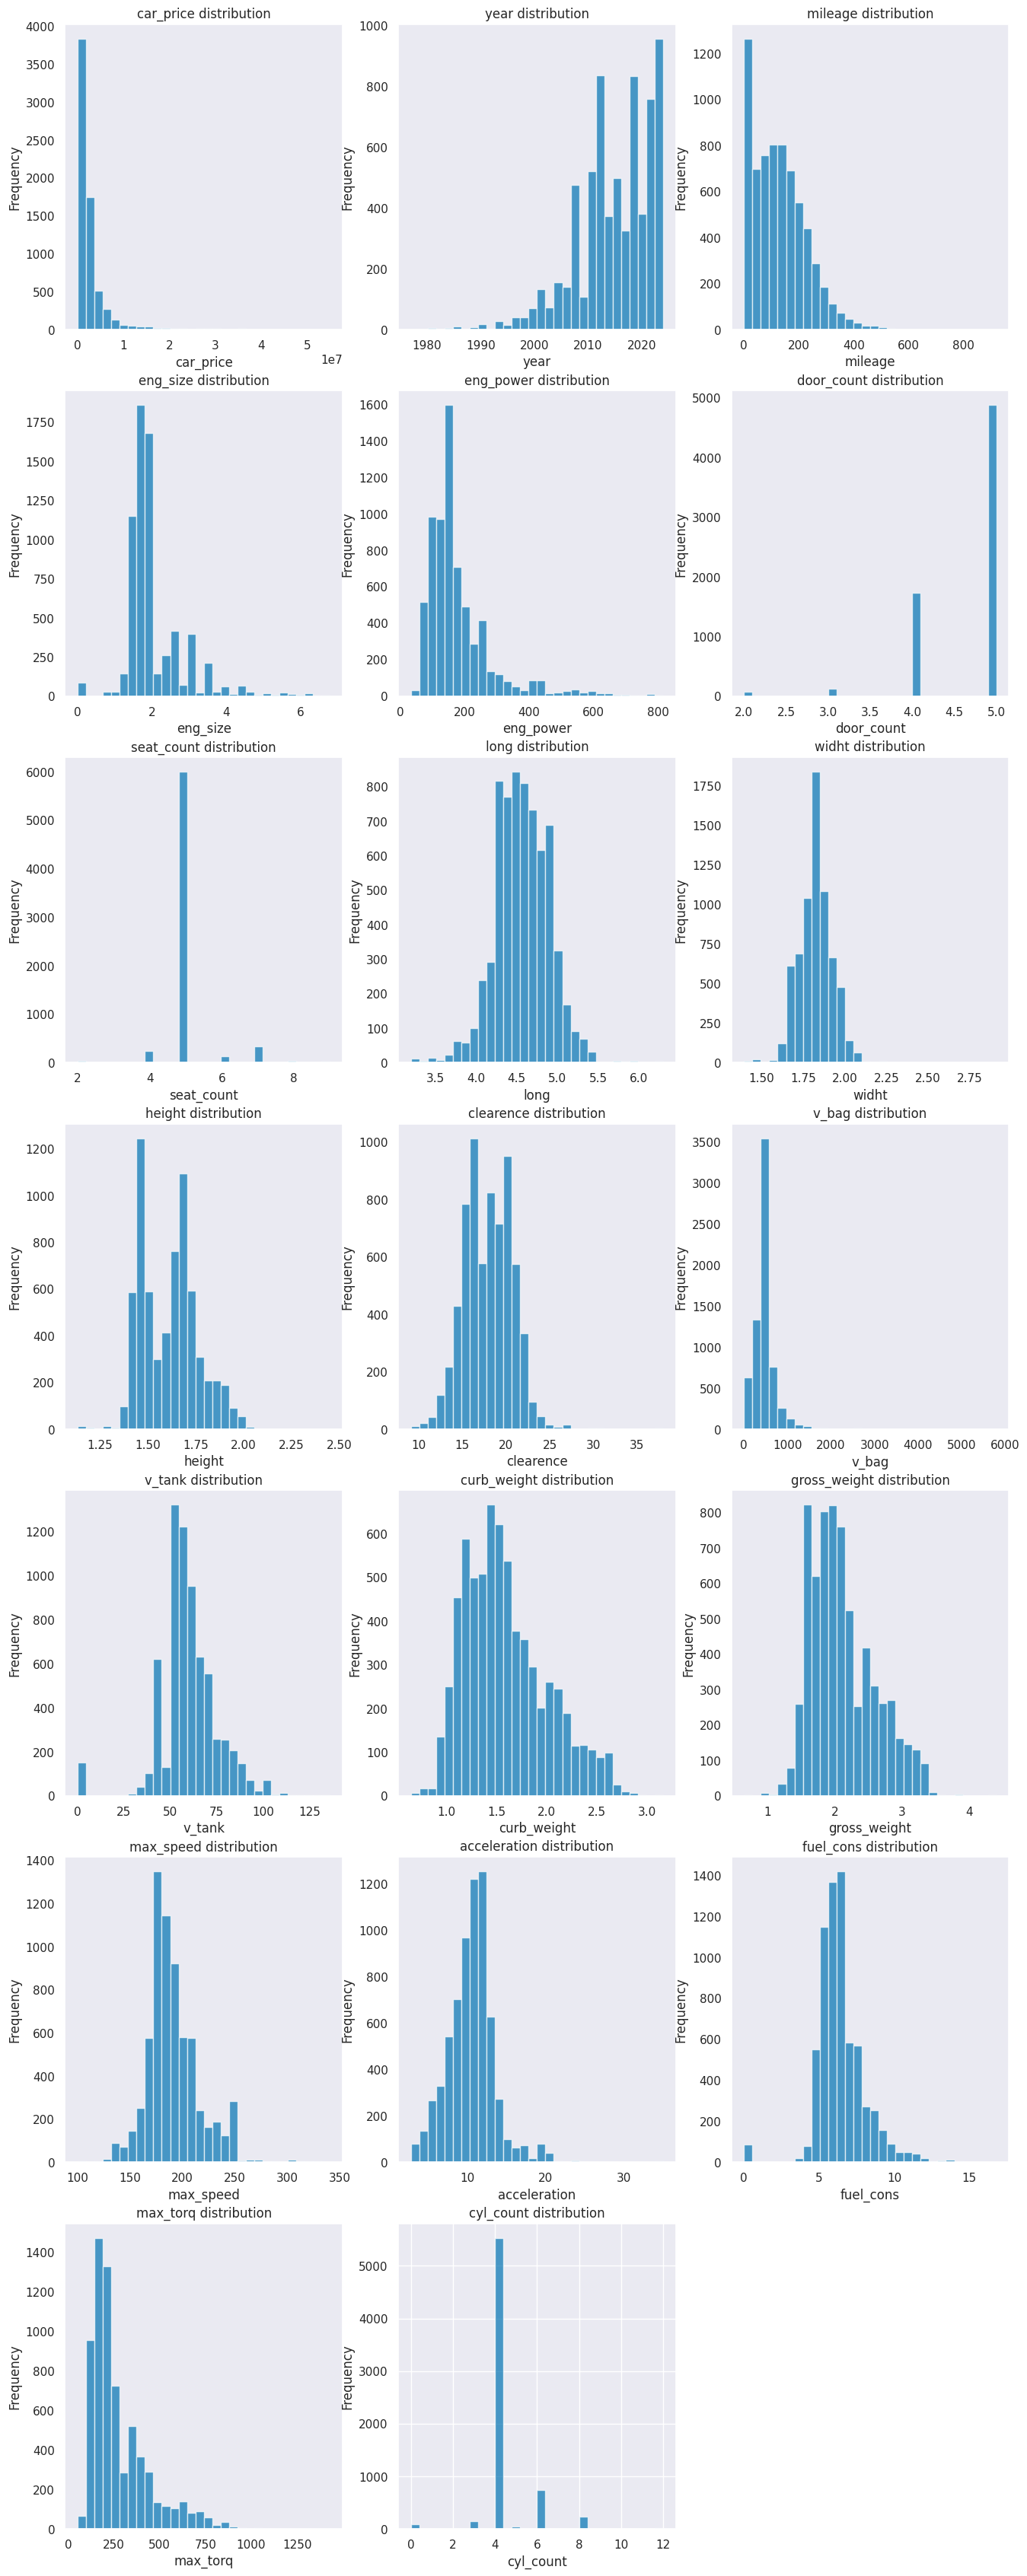

In [1723]:
numeric_cols = df.select_dtypes([int, float]).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(16, (num_cols // 3 + 1) * 7))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df[col], bins=30, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.grid()
plt.show()

В данных наблюдается некоторое искажение: для пробега автомобиля преобладают значения близкие к нулю, возможно влиение параллельного импорта. Посмотрим на разброс данных по стране производства автомобиля 

/tmp/ipykernel_557/2468762219.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_state['mileage'], fill=True)
/tmp/ipykernel_557/2468762219.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_state['mileage'], fill=True)


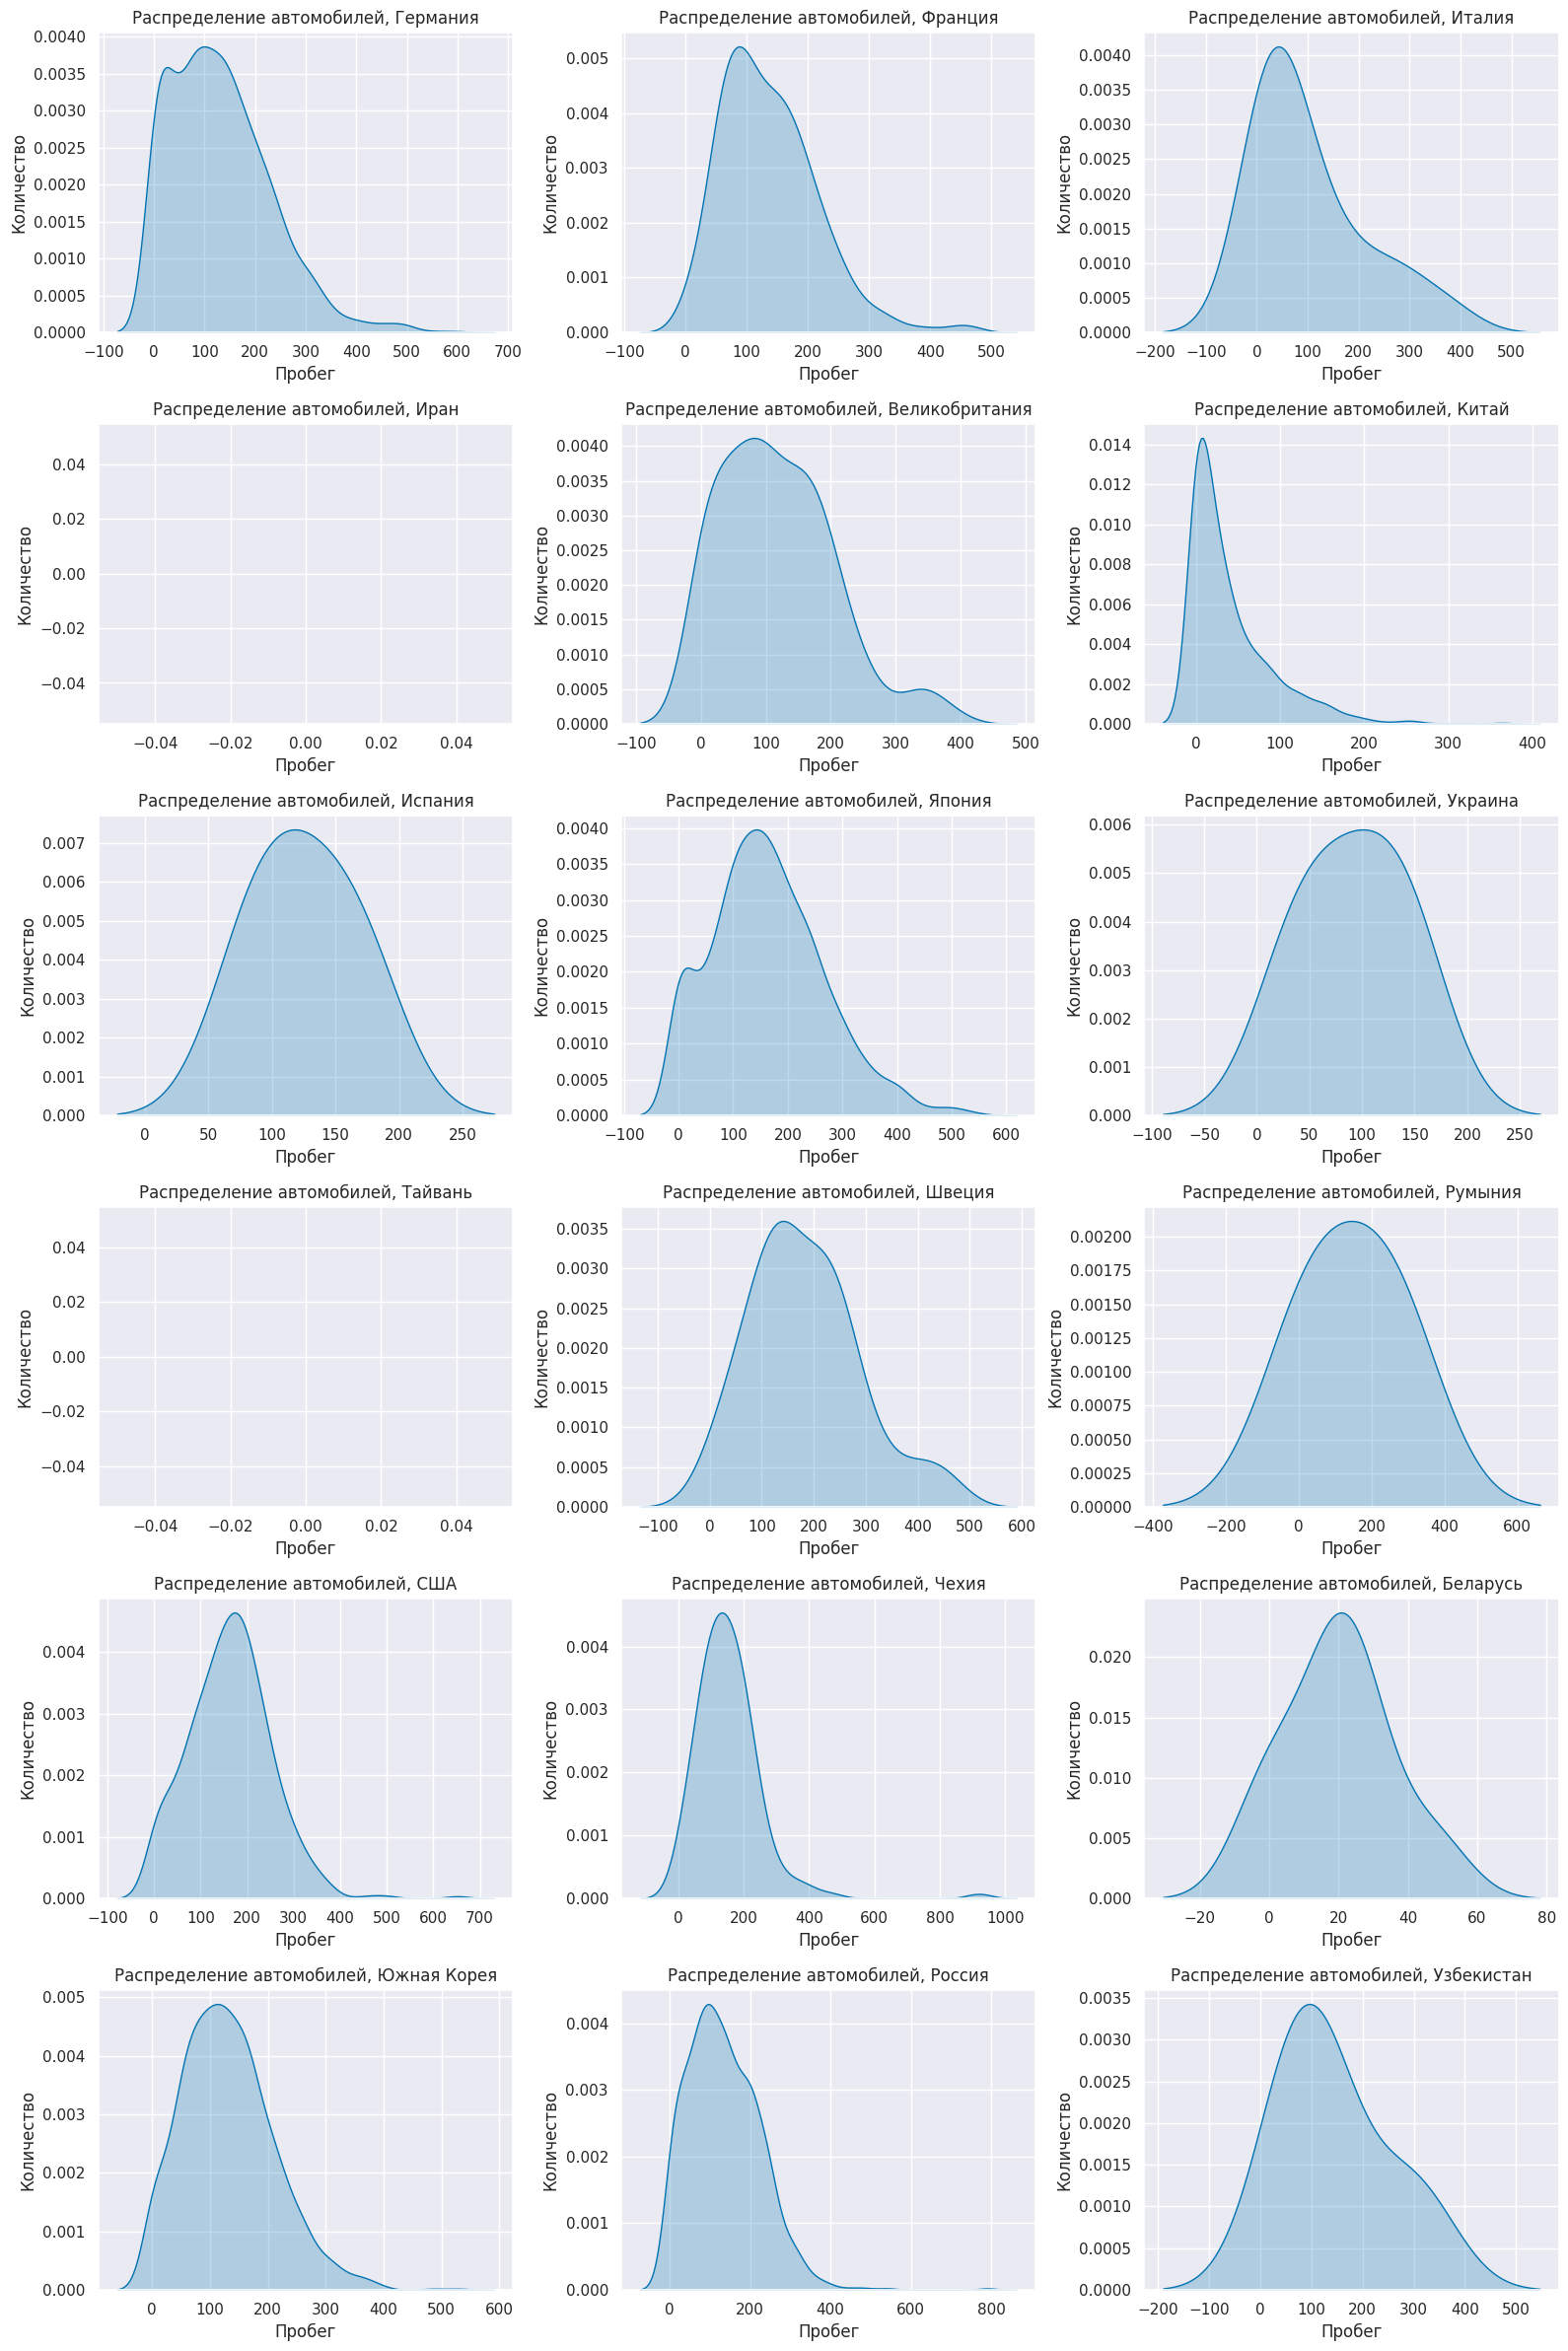

In [1724]:
total_axes = len(set(df['state_mark']))
fig = plt.figure(figsize=(16, ((total_axes//3) + (total_axes % 3))*4))
for i, state in enumerate(set(df['state_mark'])):
    ax = fig.add_subplot((total_axes//3) + (total_axes % 3), 3, i+1)
    df_state = df[df['state_mark'] == state]
    sns.kdeplot(df_state['mileage'], fill=True)
    plt.title(f'Распределение автомобилей, {state}')
    plt.xlabel('Пробег')
    plt.ylabel('Количество')
plt.tight_layout()
plt.show()

Наблюдаем сильные искажения для Китая, Беларуси - большинство подержанных автомобилей имеют малый пробег. Кроме того, автомобили из Германии и Японии имеют два пика распределения. Для построения модели скорее всего потребуется исключать автомобили с небольшим пробегом

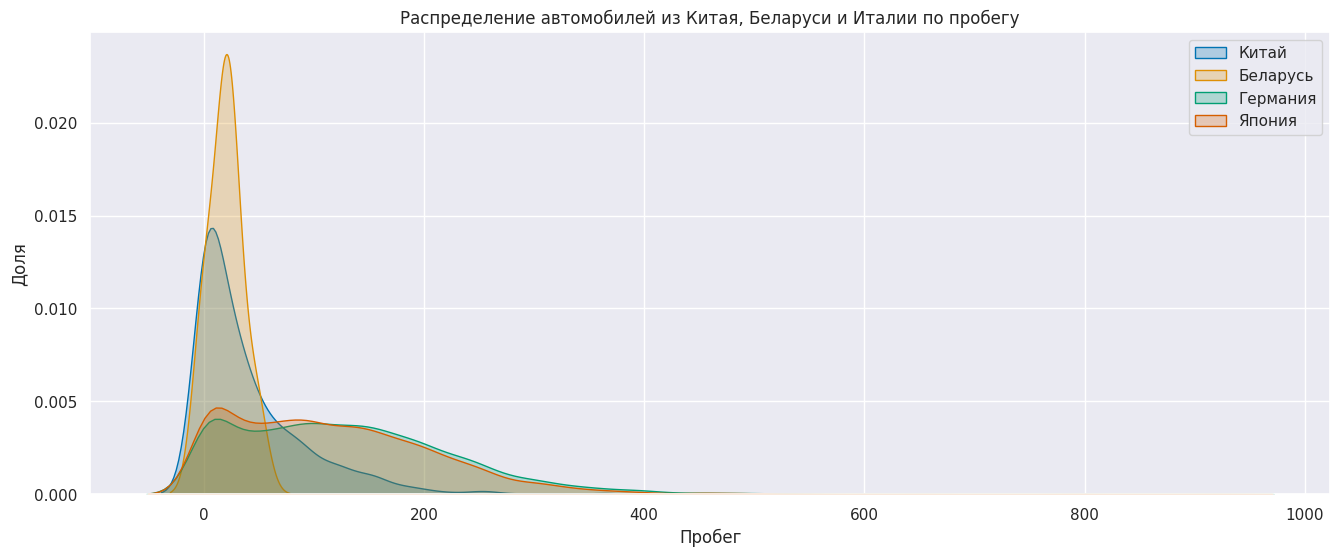

In [1725]:
plt.figure(figsize= (16,6))
df_k = df[df['state_mark'] == 'Китай']
df_b = df[df['state_mark'] == 'Беларусь']
df_g = df[df['state_mark'] != 'Германия']
df_j = df[df['state_mark'] != 'Япония']
sns.kdeplot(df_k['mileage'], fill=True, label='Китай')
sns.kdeplot(df_b['mileage'], fill=True, label='Беларусь')
sns.kdeplot(df_g['mileage'], fill=True, label='Германия')
sns.kdeplot(df_j['mileage'], fill=True, label='Япония')
plt.title("Распределение автомобилей из Китая, Беларуси и Италии по пробегу")
plt.xlabel('Пробег')
plt.ylabel('Доля')
plt.legend()
plt.show()

<Axes: >

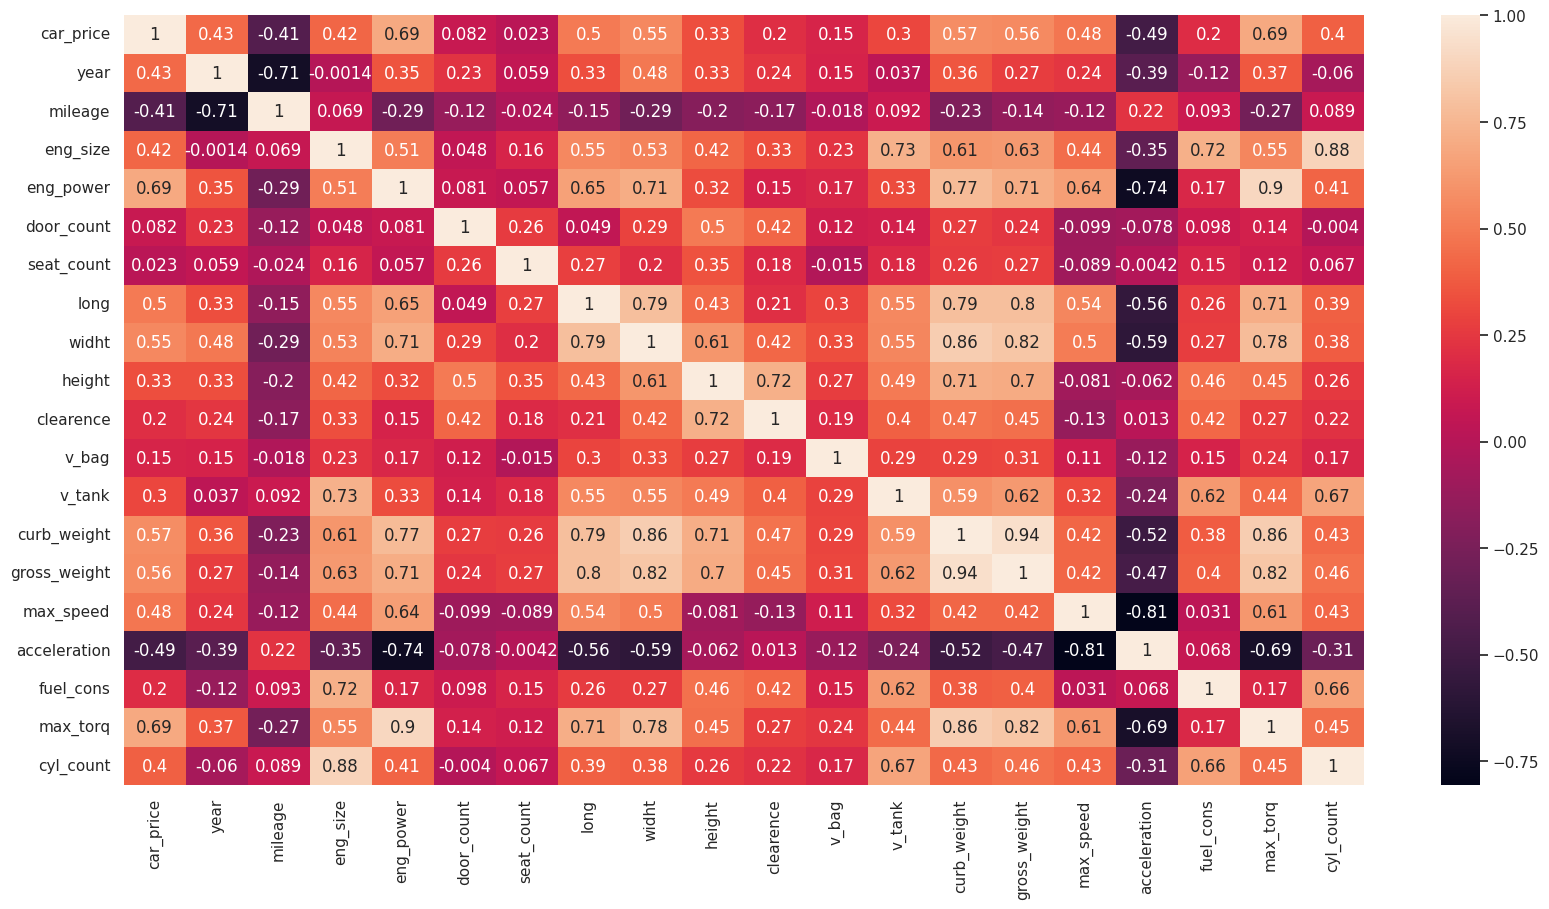

In [1726]:
df_corr = df.select_dtypes(['int', 'float'])
plt.figure(figsize= (20,10))
sns.heatmap(df_corr.corr(), annot = True, fmt='.2g')

Цена автомобиля более всего зависит от следующих числовых характеристик (в порядке убывания): 
Мощность двигателя, Крутящий момент, Снаряженная масса, Полная масса, Ширина, Длина, Разгон, Максимальная скорость, Год выпуска, Объем двигателя, Пробег.
При этом существуют значимые корреляции между характеристиками:
Мощность двигателя: Крутящий момент, Снаряженная масса, Разгон, Ширина, Полная масса, Длина
Крутящий момент: Мощность двигателя, Cнаряженная масса, Полная масса, Ширина, Длина
Снаряженная масса: Полная масса, Ширина, Крутящий момент, Длина
Полная масса: Снаряженная масса, Крутящий момент, Ширина, Длина
Ширина: Снаряженная масса, Полная масса, Длина, Крутящий момент
Длина: Снаряженная масса, Полная масса, Ширина, Крутящий момент

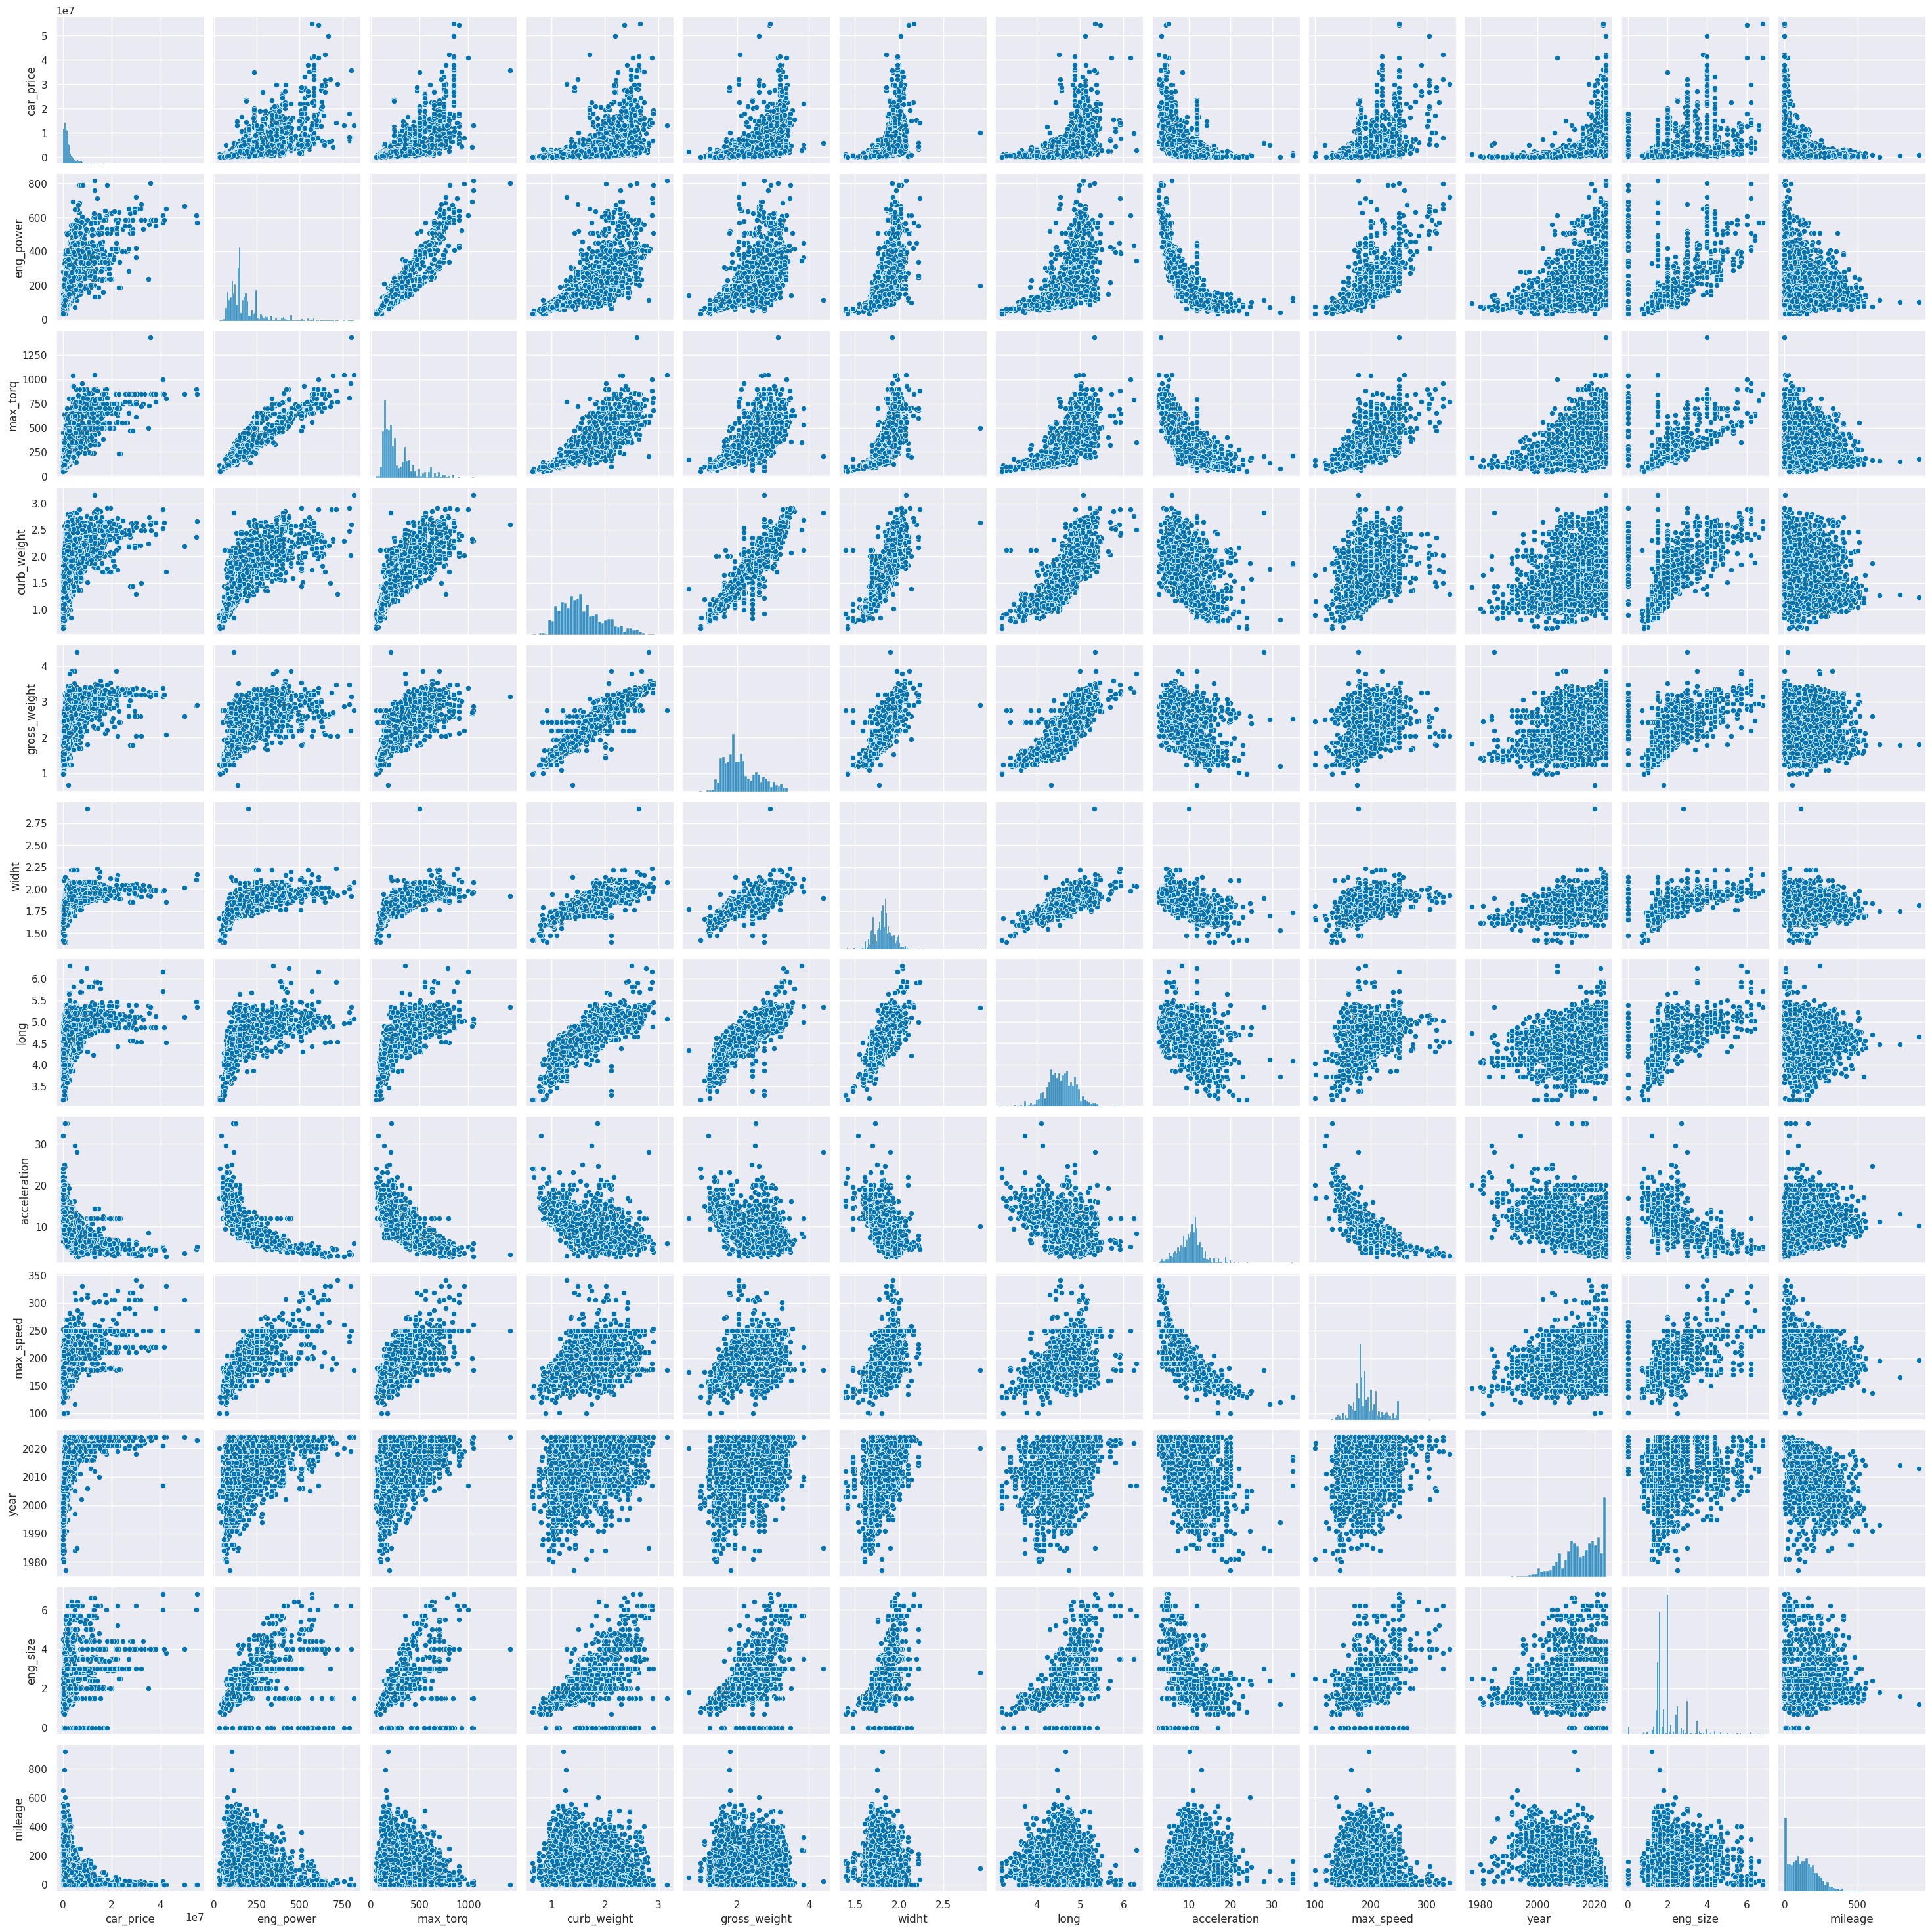

In [1727]:
sns.pairplot(df[['car_price', 'eng_power', 'max_torq', 'curb_weight', 'gross_weight', 'widht', 'long', 'acceleration', 'max_speed', 'year', 'eng_size', 'mileage']])

Исходя из представленных графиков, следует рассмотреть возможность исключения из модели данных по одного элемента из пар характеристик:
Крутящий момент - мощность двигателя - разгон
Полная масса - Снаряженная масса
Длина - ширина
Зависимости между ними очень сильные